In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-21-2020.csv')

In [3]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-21 23:30:50,34.223334,-82.461707,17,0,0,17,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-21 23:30:50,30.295065,-92.414197,114,7,0,107,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-21 23:30:50,37.767072,-75.632346,52,0,0,52,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-21 23:30:50,43.452658,-116.241552,616,12,0,604,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-21 23:30:50,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [4]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-21 23:30:50,34.223334,-82.461707,17,0,0,17,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-21 23:30:50,30.295065,-92.414197,114,7,0,107,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-21 23:30:50,37.767072,-75.632346,52,0,0,52,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-21 23:30:50,43.452658,-116.241552,616,12,0,604,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-21 23:30:50,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [5]:
cols = confirmed_df.keys()

In [6]:
confirmed_df.loc[:,cols[-1]]#Prueba para extraer datos

0      13659
1       1099
2       9134
3        764
4         81
       ...  
261      463
262      283
263       87
264     3686
265        2
Name: 5/29/20, Length: 266, dtype: int64

In [7]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,964,969,981,989,998,1004,1029,1050,1076,1099
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,762,762,762,762,762,763,763,763,763,764
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,52,58,60,61,69,70,70,71,74,81


In [8]:
confirmed = confirmed_df.loc[:,cols[4]:cols[-1]]#array of numbers
deaths = deaths_df.loc[:,cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:,cols[4]:cols[-1]]

In [9]:
#Case of study
#TOTALS
dates = confirmed.keys()
world_cases = []
total_deaths = []
#RATES
mortality_rate = []
recovery_rate = []
#ACTIVES AND RECOVEREDS
total_recovered = []
total_active = []

#COUNTRIES ANALYSIS
china_cases = []
italy_cases = []
us_cases = []
spain_cases = []
france_cases = []
germany_cases = []
uk_cases = []
mex_cases = []

china_deaths = []
italy_deaths = []
us_deaths = []
spain_deaths = []
france_deaths = []
germany_deaths = []
uk_deaths = []
mex_deaths = []

china_recoveries = []
italy_recoveries = []
us_recoveries = []
spain_recoveries = []
france_recoveries = []
germany_recoveries = []
uk_recoveries = []
mex_recoveries = []

for i in dates:
    #sum all de cases in all the countries in each date
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()

    # confirmed, deaths, recovered, and active
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    #calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    
    #case studies
    #CONFIRMATIONS
    #filtering first by country and then by date 
    china_cases.append(confirmed_df[confirmed_df['Country/Region'] =='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region'] == 'Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region'] == 'US'][i].sum())
    spain_cases.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_df[confirmed_df['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_df[confirmed_df['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_df[confirmed_df['Country/Region']=='United Kingdom'][i].sum())
    mex_cases.append(confirmed_df[confirmed_df['Country/Region']=='Mexico'][i].sum())
    
    #DEATHS
    china_deaths.append(deaths_df[deaths_df['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_df[deaths_df['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_df[deaths_df['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_df[deaths_df['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_df[deaths_df['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_df[deaths_df['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_df[deaths_df['Country/Region']=='United Kingdom'][i].sum())
    mex_deaths.append(deaths_df[deaths_df['Country/Region']=='Mexico'][i].sum())
    
    #RECOVERIES
    china_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='United Kingdom'][i].sum())
    mex_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Mexico'][i].sum())

Getting daily increases

In [10]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(abs(data[i]-data[i-1]))
    return d 

# confirmed cases
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
mex_daily_increase = daily_increase(mex_cases)

# deaths
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
mex_daily_death = daily_increase(mex_deaths)

# recoveries
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
mex_daily_recovery = daily_increase(mex_recoveries)


days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)#Vector fila para cada elemento del array
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

Future forecasting

In [11]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forcast[:-10]

In [12]:
start = '1/22/2020' # Preparamos el tiempo tanto del formato a predecir como del que tenemos 
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y') )

In [13]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22,world_cases,test_size=0.07, shuffle=False)

In [14]:
#use this to find the optimal parameters for SVR
#c = [0.01, 0.1, 1]
#gamma = [0.01, 0.1, 1]
#epsilon = [0.01, 0.1, 1]
#shrinking = [True, False]
#degree = [3, 4, 5, 6, 7]

#svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking, 'degree': degree}

#svm = SVR(kernel='poly')
#svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
#svm_search.fit(X_train_confirmed, y_train_confirmed)

In [15]:
# svm_search.best_params_

In [16]:
#svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01,epsilon=1,degree = 4, C = 0.1)
svm_confirmed.fit(X_train_confirmed,y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

c:\users\ralph\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 1726287.0638751604
MSE: 3120212226945.837


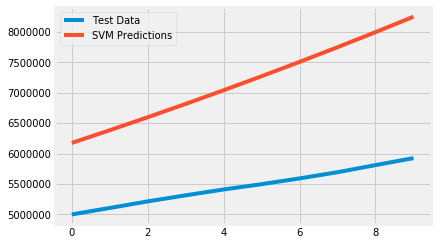

In [17]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [18]:
#Transform our data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=4)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [19]:
# polinomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed,y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 419823.46147034614
MSE: 210038324597.80984


In [20]:
print(linear_model.coef_)

[[-1.22795873e+05  3.57553463e+04 -1.86476368e+03  3.16839861e+01
  -1.31028403e-01]]


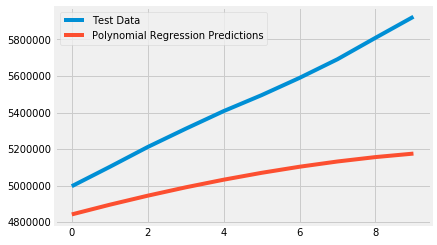

In [21]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [22]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol':tol, 'alpha_1':alpha_1,'alpha_2':alpha_2,'lambda_1':lambda_1, 'lambda_2': lambda_2,
                'normalize':normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian,bayesian_grid, scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,n_iter=40,verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed,y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.7s finished
c:\users\ralph\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\ralph\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           compute_score=False, copy_X=True,
                                           fit_intercept=False, lambda_1=1e-06,
                                           lambda_2=1e-06, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                 

In [23]:
bayesian_search.best_params_

{'tol': 0.01,
 'normalize': True,
 'lambda_2': 1e-07,
 'lambda_1': 0.001,
 'alpha_2': 1e-06,
 'alpha_1': 0.0001}

In [24]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 551444.0217852205
MSE: 321457039440.4569


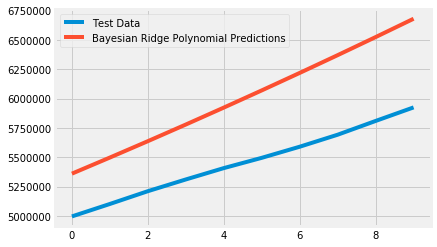

In [25]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

 Graphing the number of confirmed cases, active cases, deaths, recoveries, mortality rate, and recovery rate

In [26]:
adjusted_dates.reshape(1, -1)[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128])

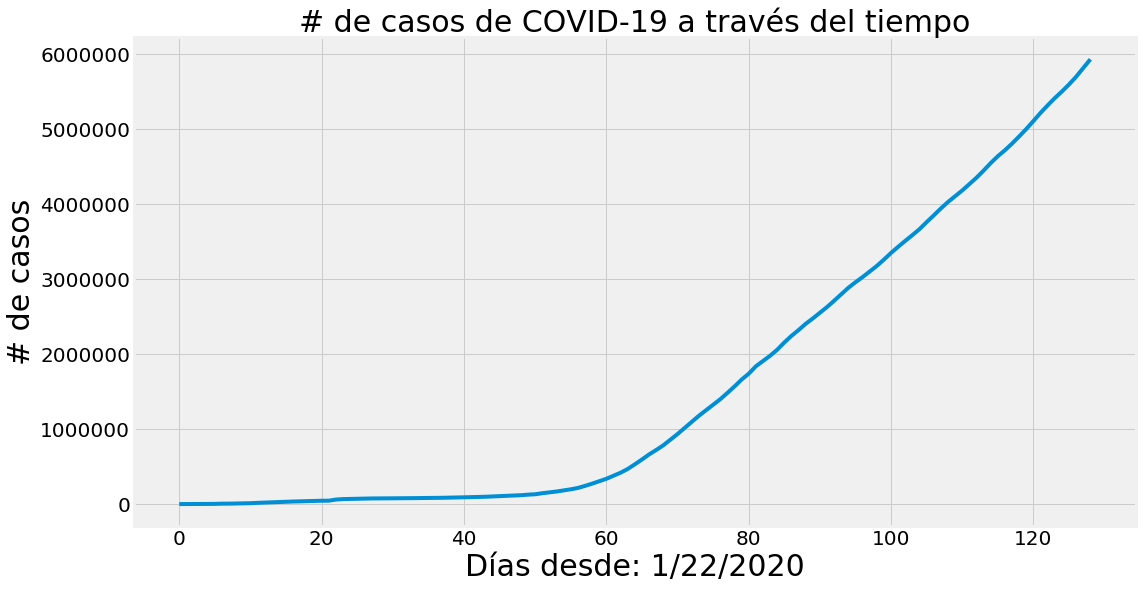

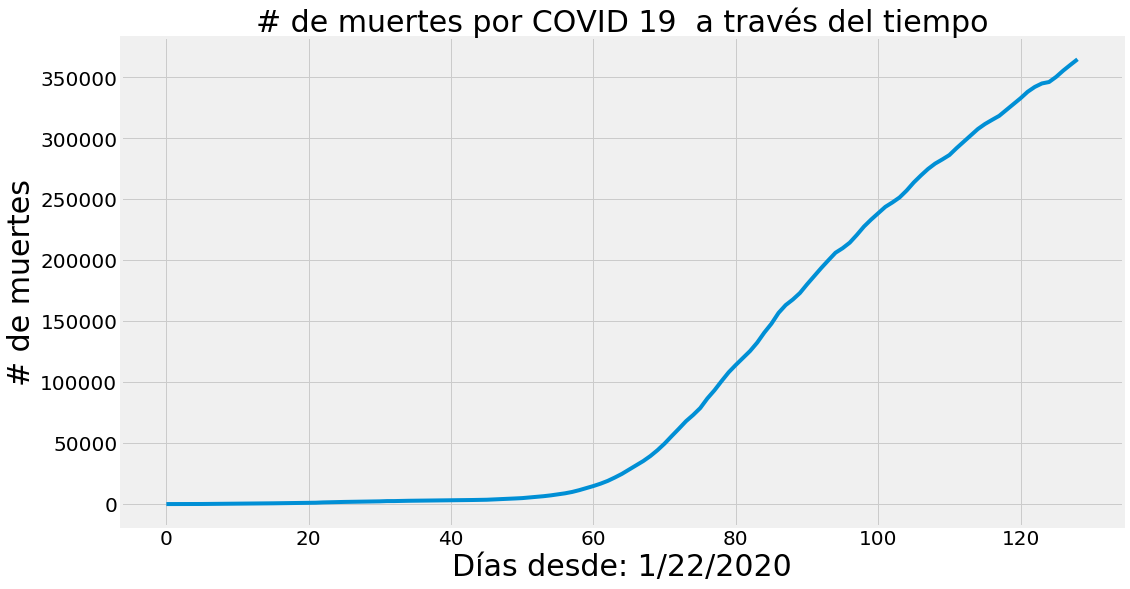

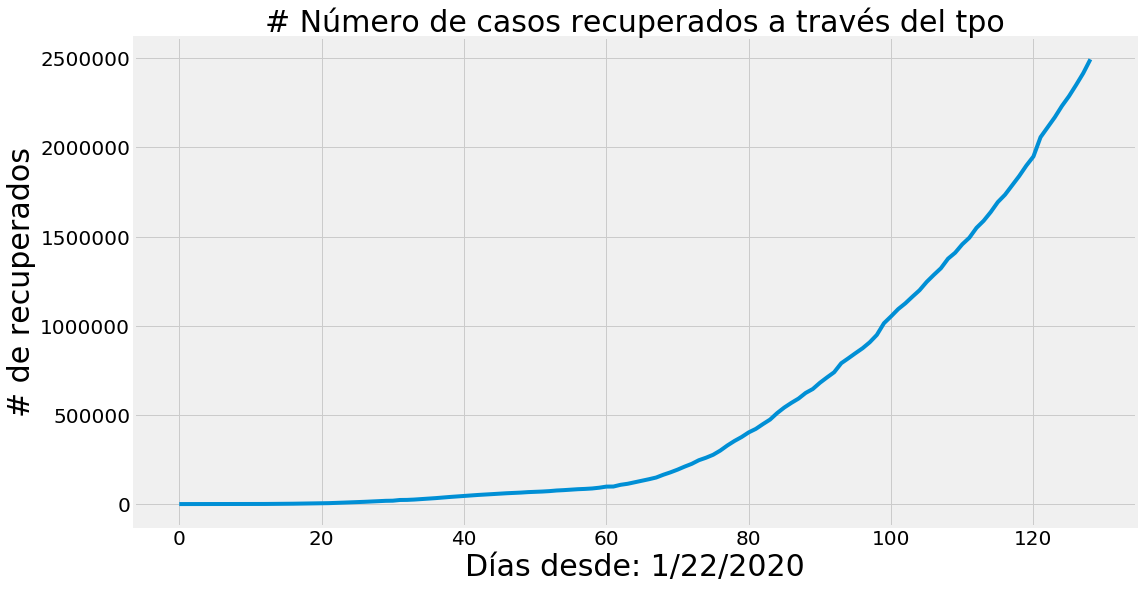

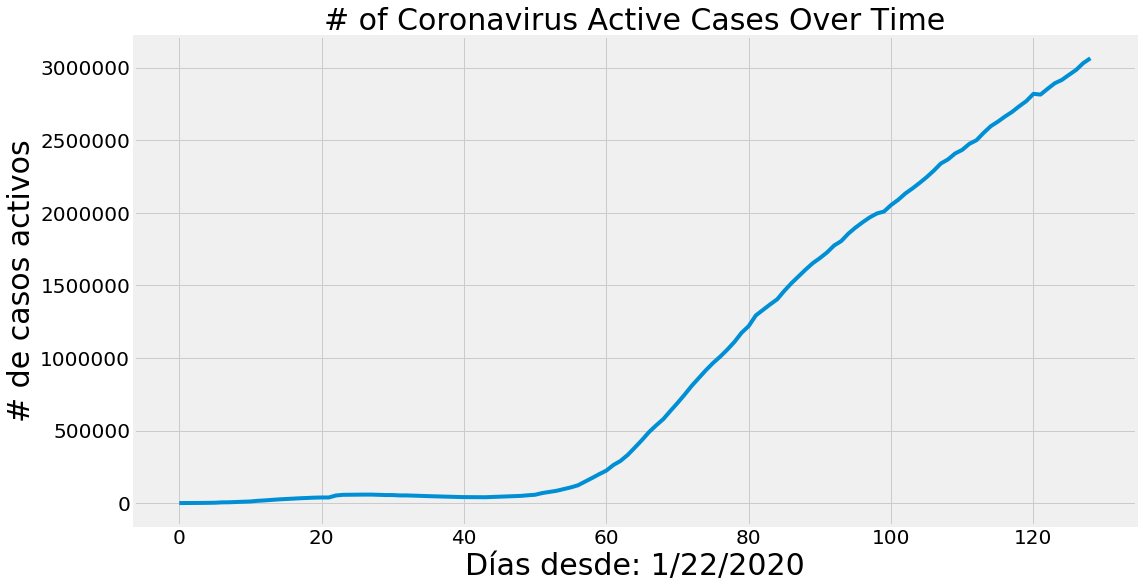

In [27]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0] #return dthe data into the original form
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('# de casos de COVID-19 a través del tiempo', size=30)
plt.xlabel('Días desde: 1/22/2020', size=30)
plt.ylabel('# de casos', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths)
plt.title('# de muertes por COVID 19  a través del tiempo', size=30)
plt.xlabel('Días desde: 1/22/2020', size=30)
plt.ylabel('# de muertes', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered)
plt.title('# Número de casos recuperados a través del tpo', size=30)
plt.xlabel('Días desde: 1/22/2020', size=30)
plt.ylabel('# de recuperados', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active)
plt.title('# of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Días desde: 1/22/2020', size=30)
plt.ylabel('# de casos activos', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [28]:
def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y1)
    plt.title('{} Casos confirmados'.format(country), size=30)
    plt.xlabel('Días desde 1/22/2020', size=30)
    plt.ylabel('# de casos', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y2)
    plt.title('{} incremento diario en casos confirmados'.format(country), size=30)
    plt.xlabel('dias desde 1/22/2020', size=30)
    plt.ylabel('# de casos', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y3)
    plt.title('{} Incremento diario en muertes'.format(country), size=30)
    plt.xlabel('dias desde  1/22/2020', size=30)
    plt.ylabel('# de muertes', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y4)
    plt.title('{} incremento diario en recuperaciones'.format(country), size=30)
    plt.xlabel('dias desde 1/22/2020', size=30)
    plt.ylabel('# de casos', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

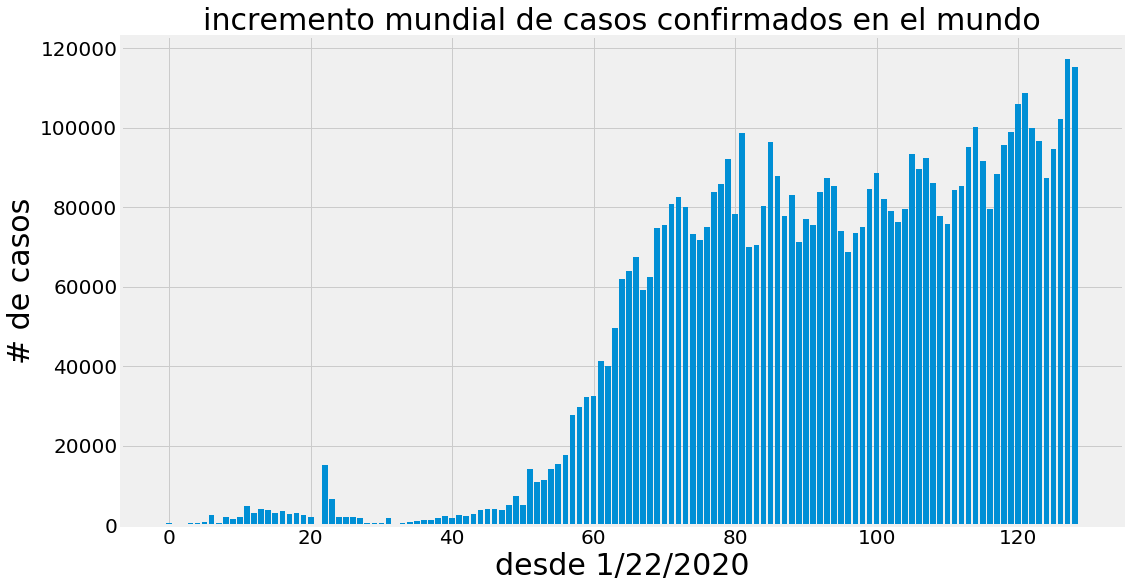

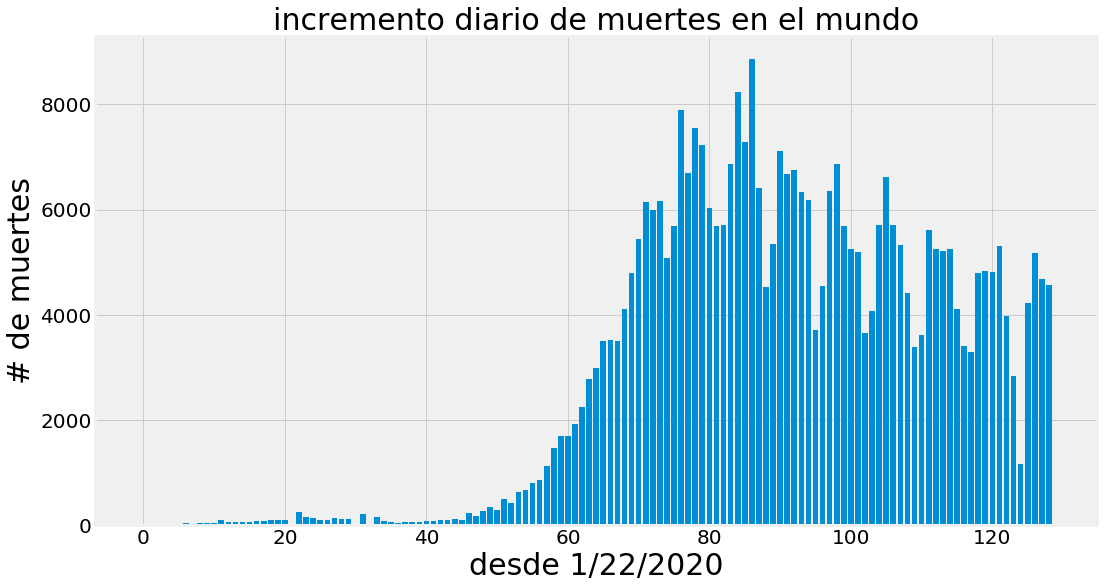

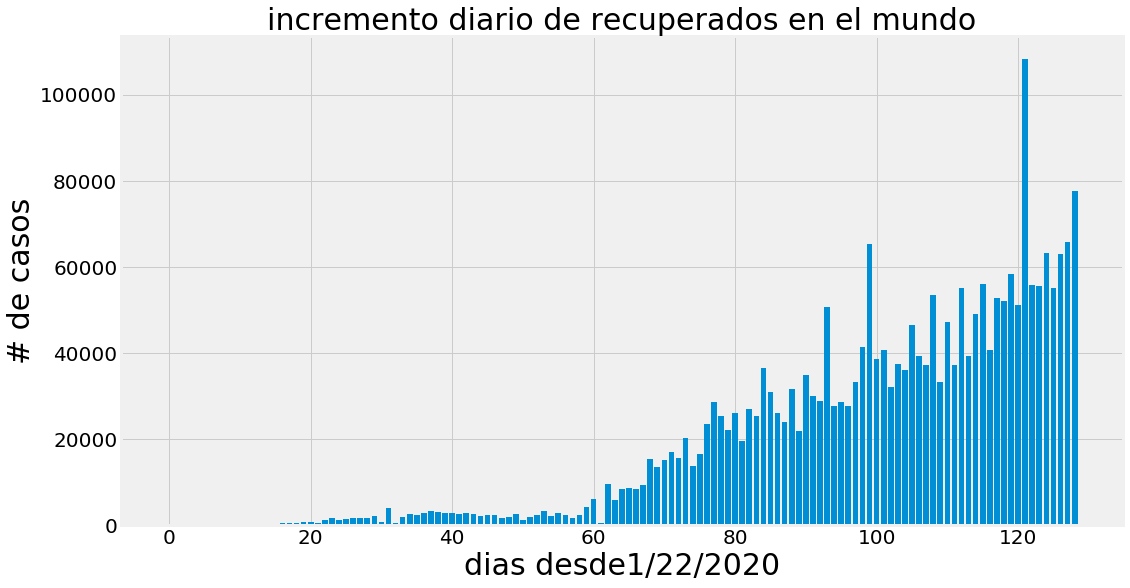

In [29]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('incremento mundial de casos confirmados en el mundo', size=30)
plt.xlabel('desde 1/22/2020', size=30)
plt.ylabel('# de casos', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_death)
plt.title('incremento diario de muertes en el mundo', size=30)
plt.xlabel('desde 1/22/2020', size=30)
plt.ylabel('# de muertes', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_recovery)
plt.title('incremento diario de recuperados en el mundo', size=30)
plt.xlabel('dias desde1/22/2020', size=30)
plt.ylabel('# de casos', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

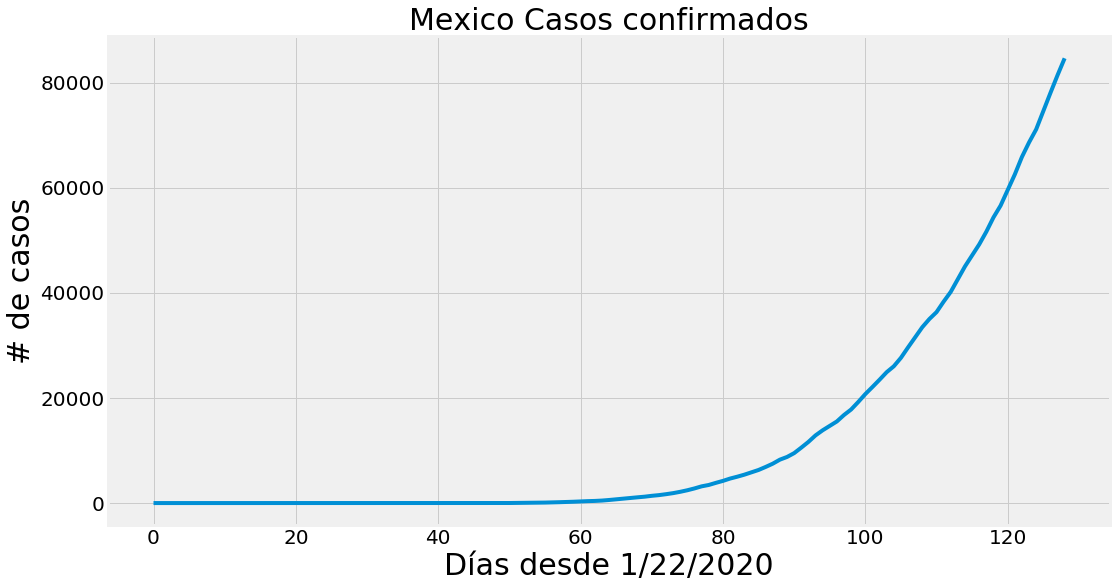

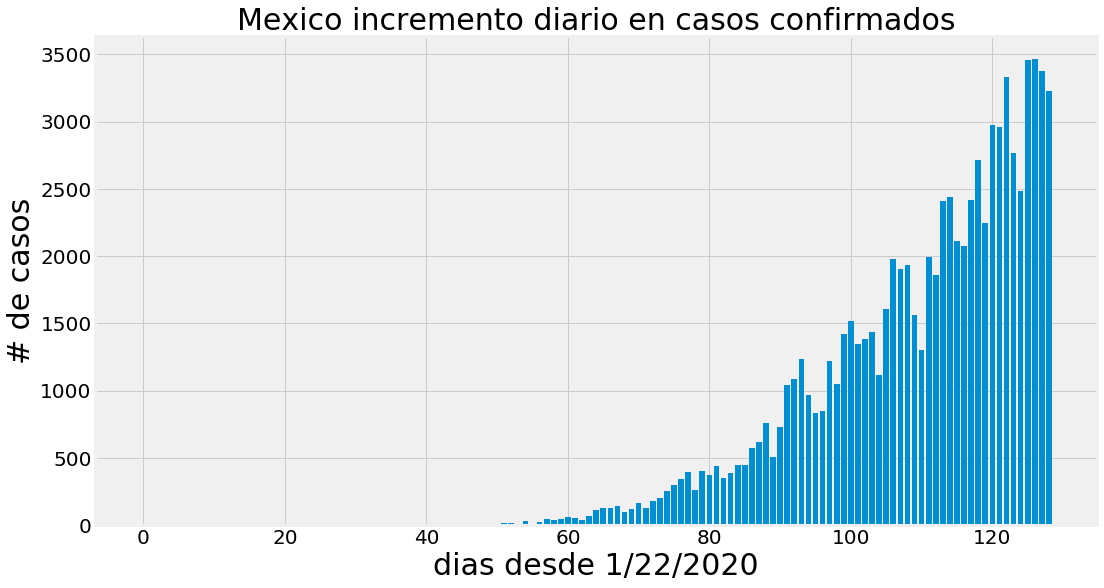

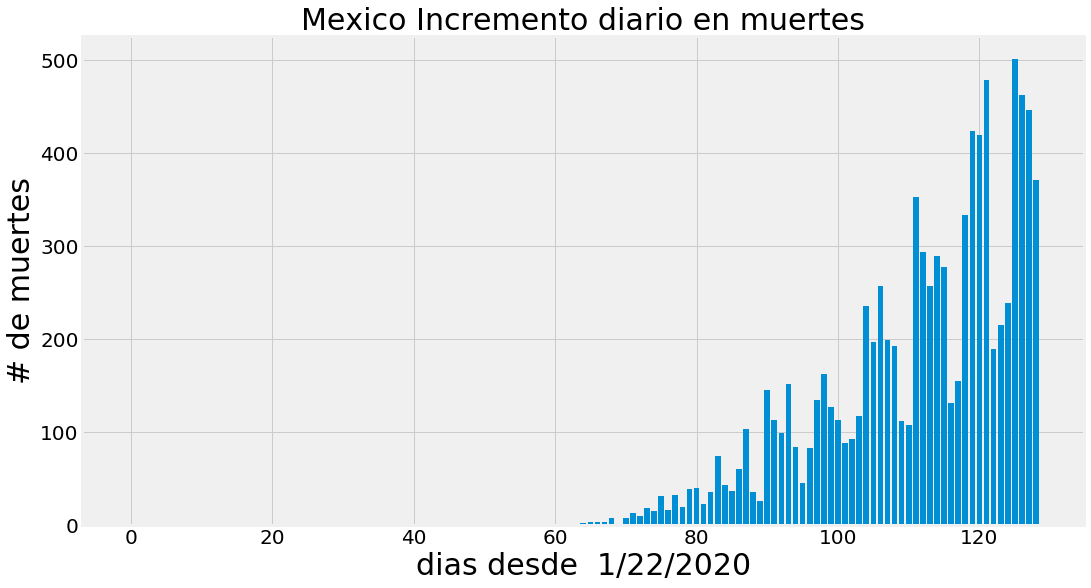

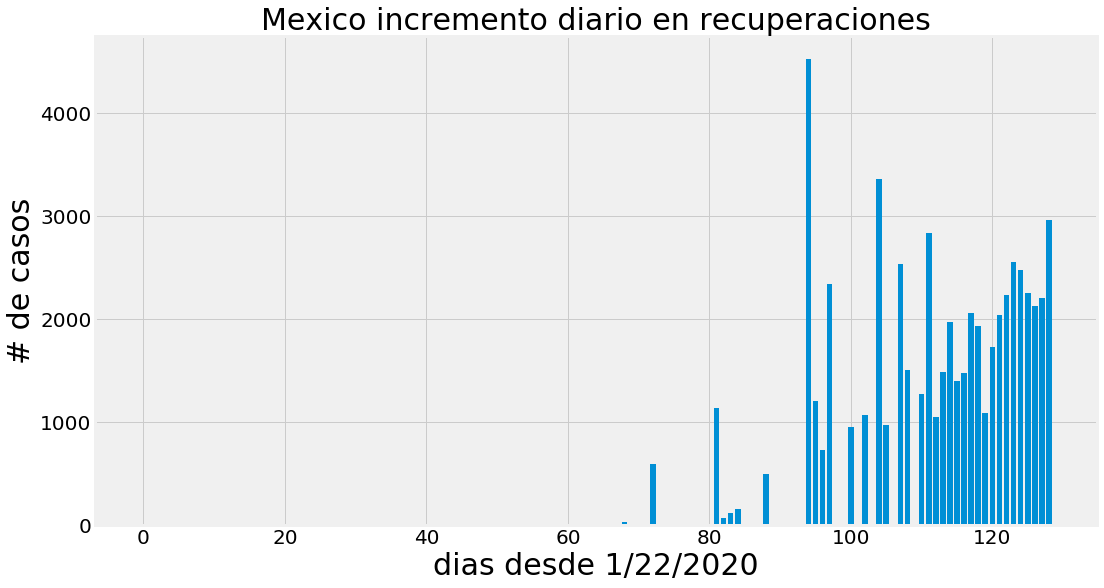

In [30]:
country_plot(adjusted_dates, mex_cases, mex_daily_increase, mex_daily_death, mex_daily_recovery, 'Mexico')

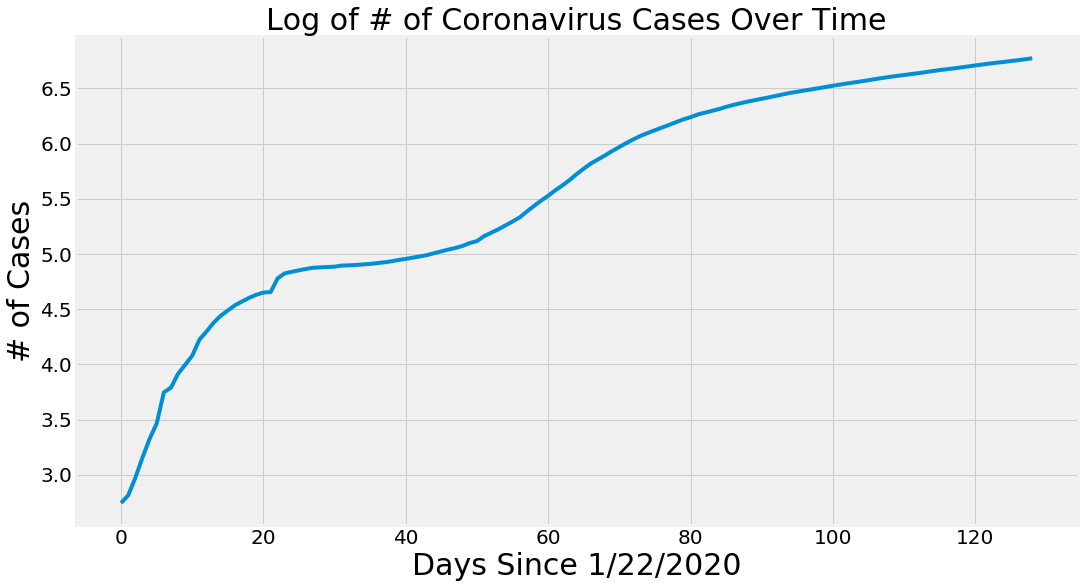

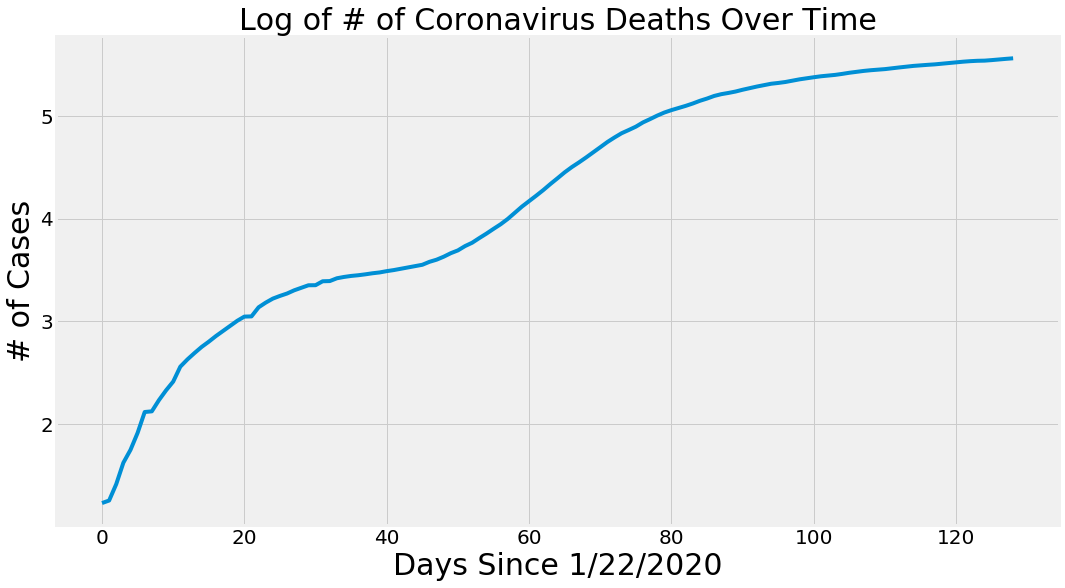

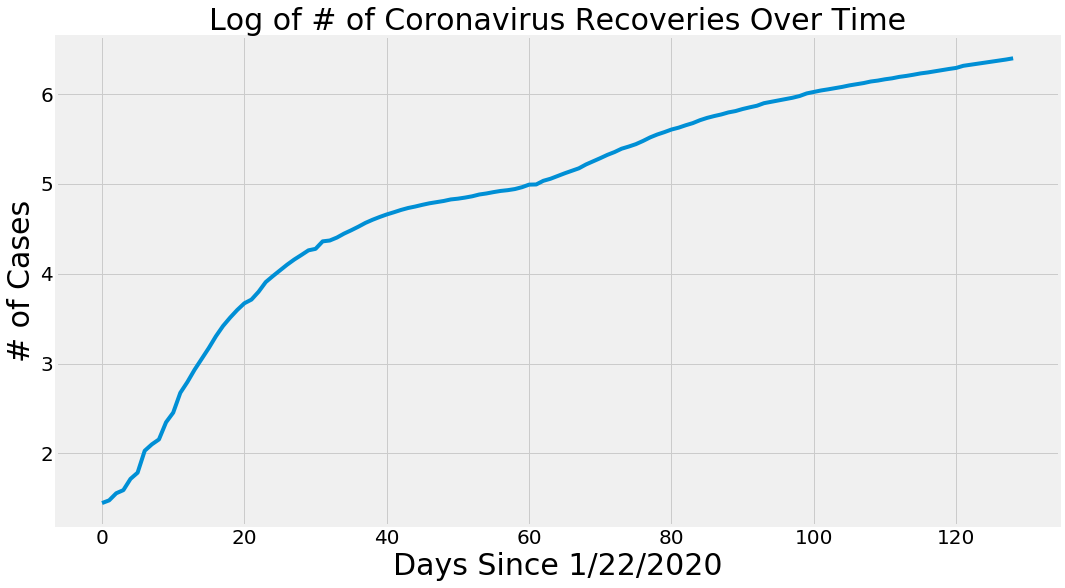

In [31]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.title('Log of # of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, np.log10(total_deaths))
plt.title('Log of # of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, np.log10(total_recovered))
plt.title('Log of # of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

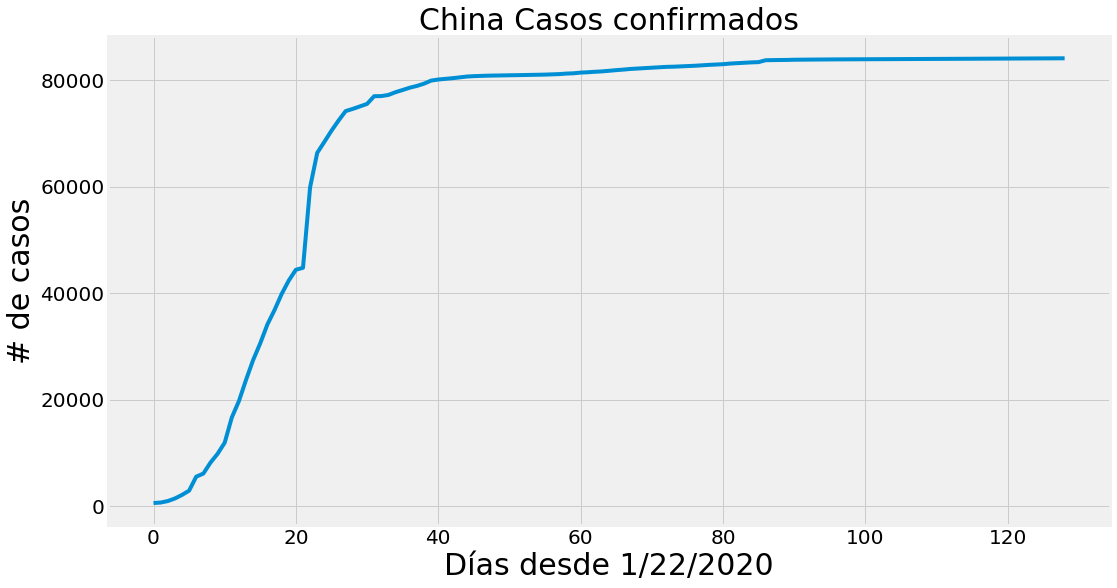

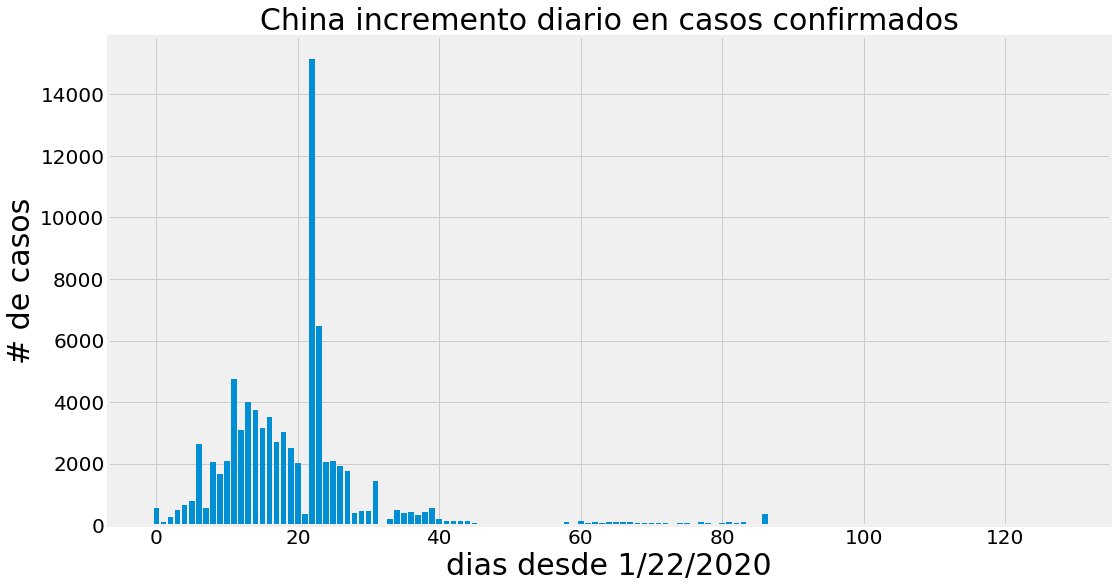

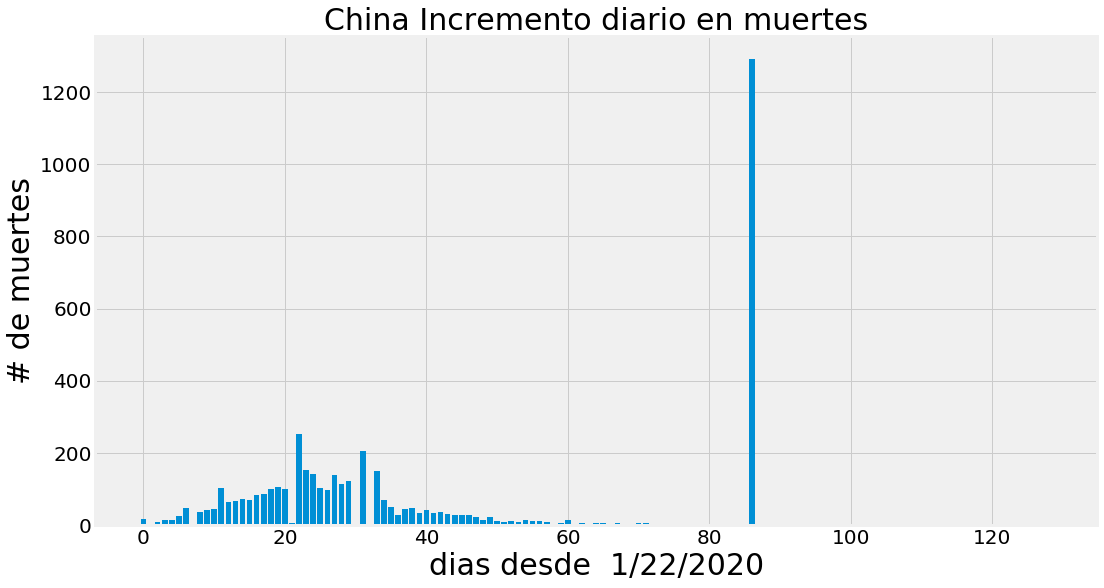

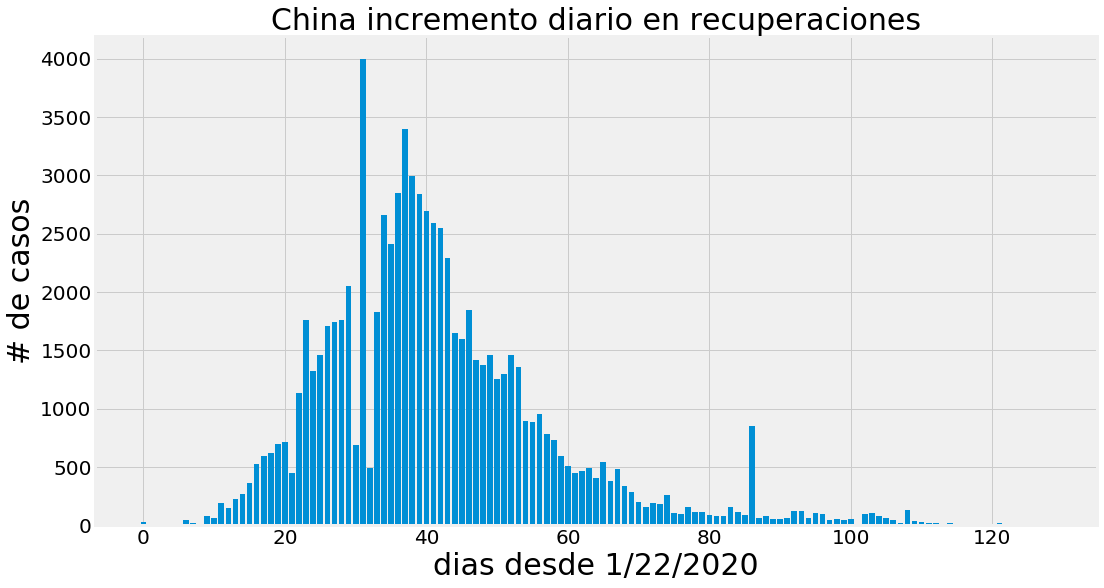

In [32]:
country_plot(adjusted_dates, china_cases, china_daily_increase, china_daily_death, china_daily_recovery, 'China')

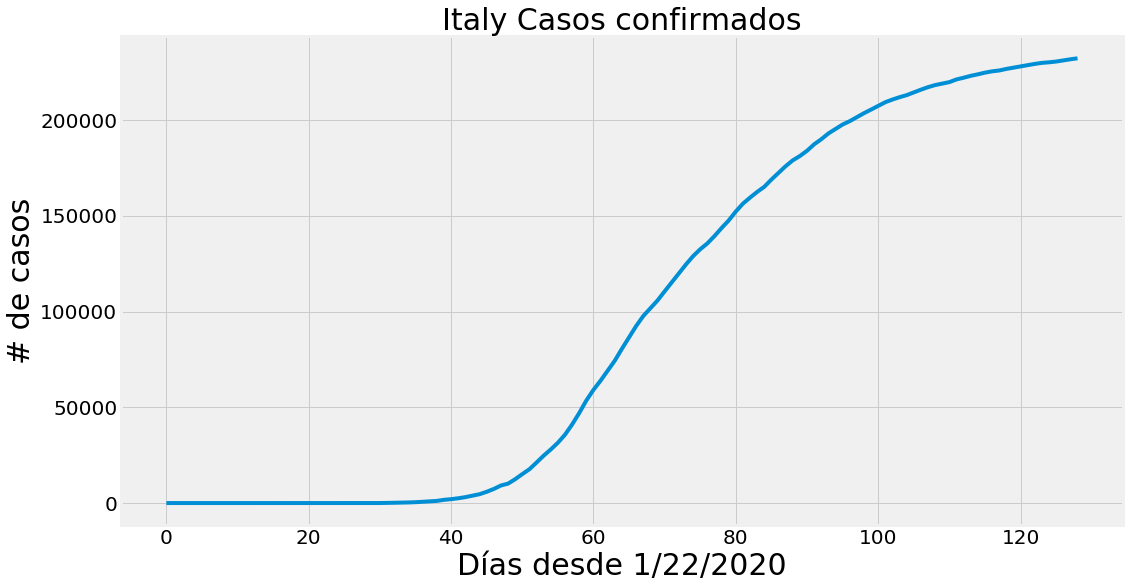

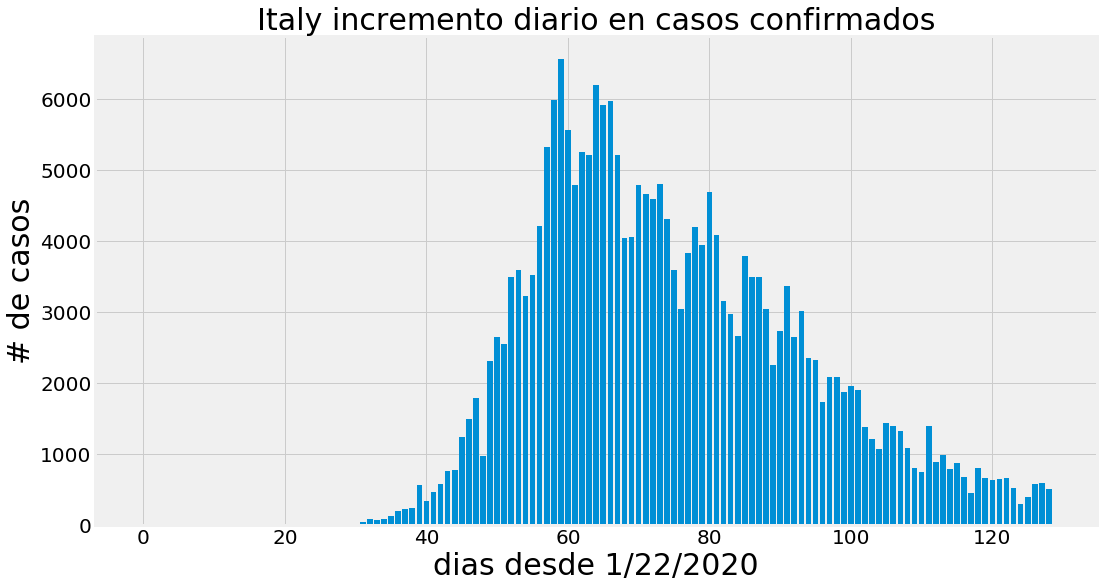

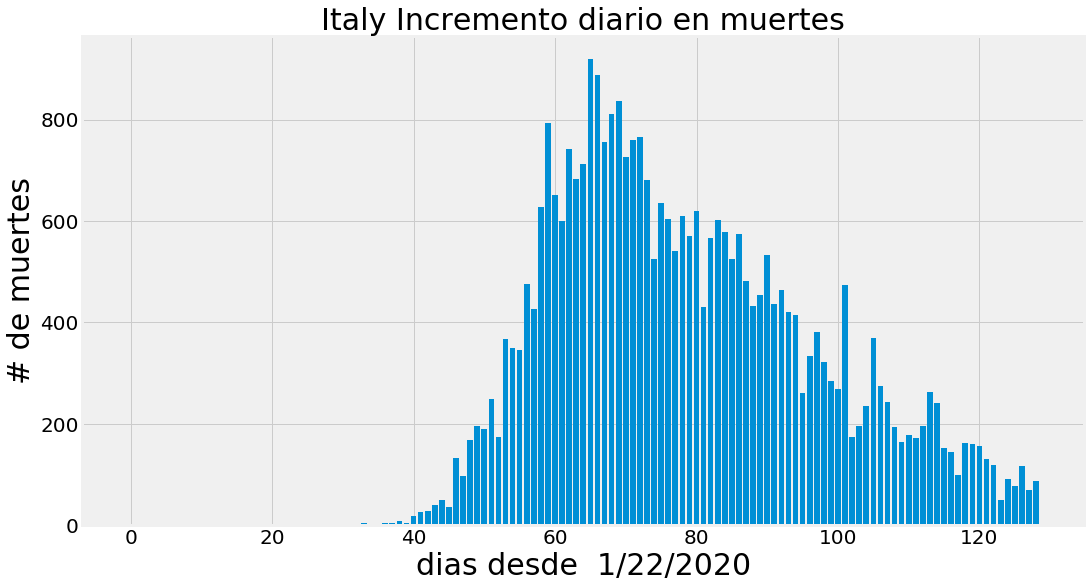

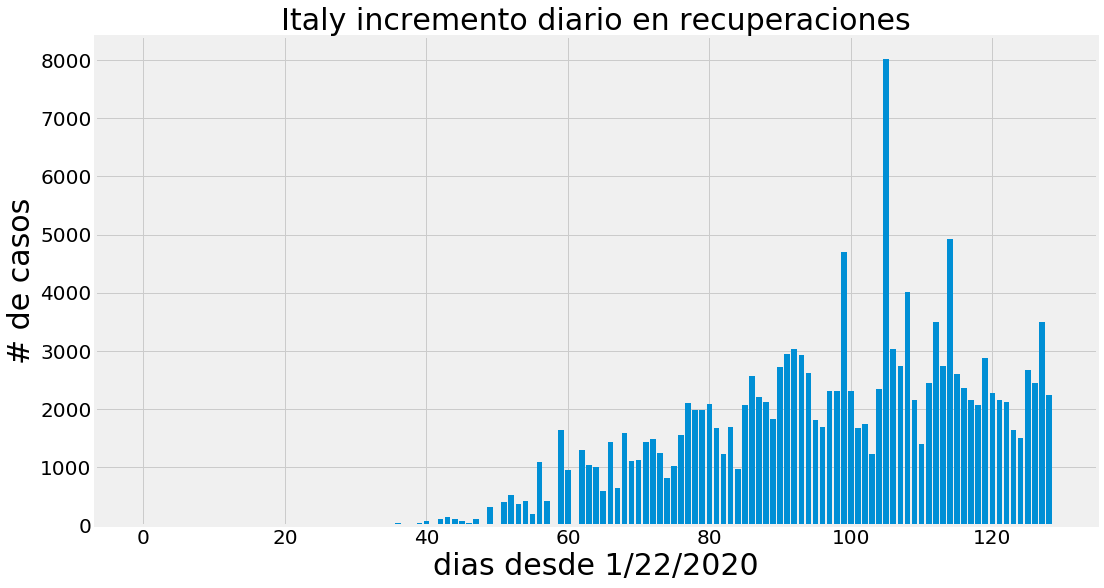

In [33]:
country_plot(adjusted_dates, italy_cases, italy_daily_increase, italy_daily_death, italy_daily_recovery, 'Italy')

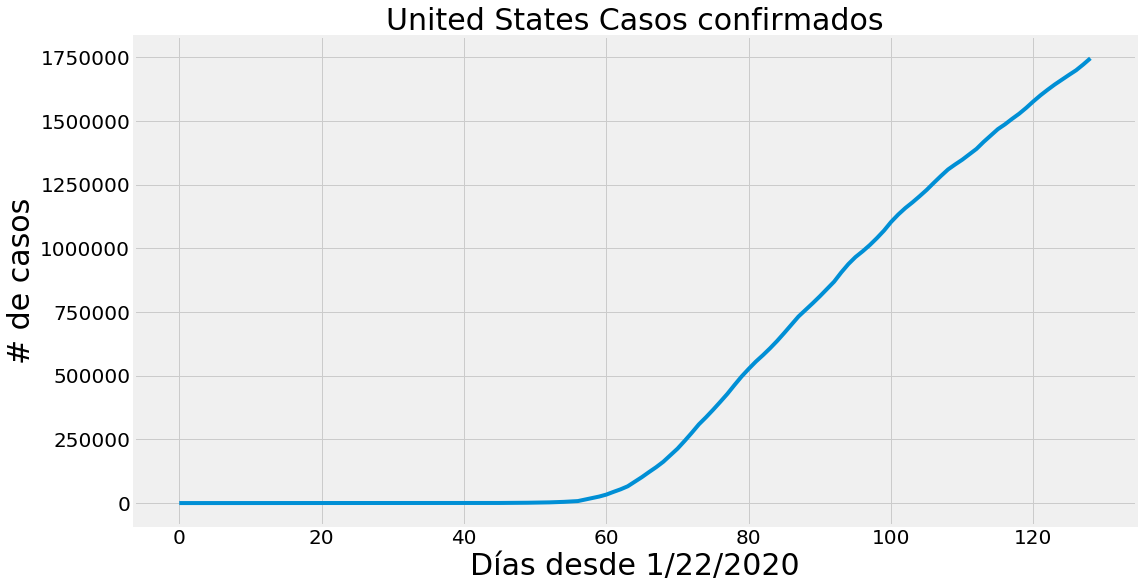

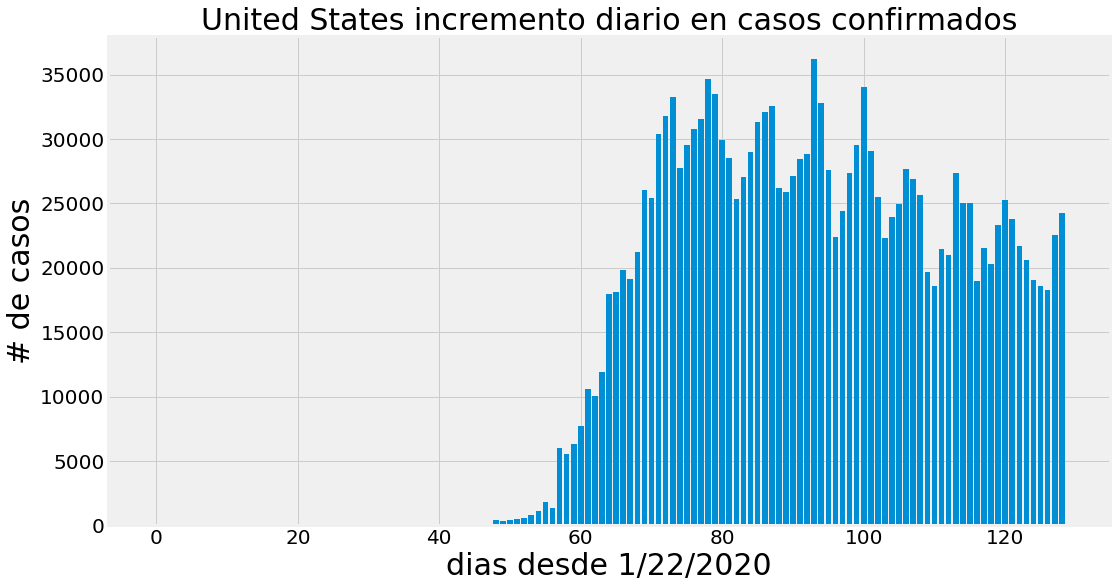

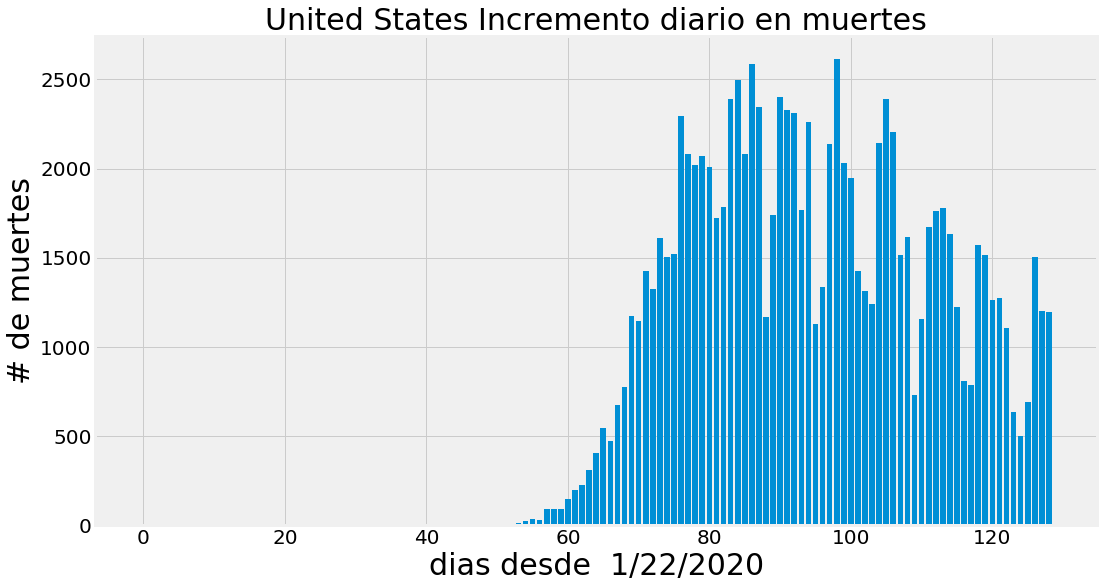

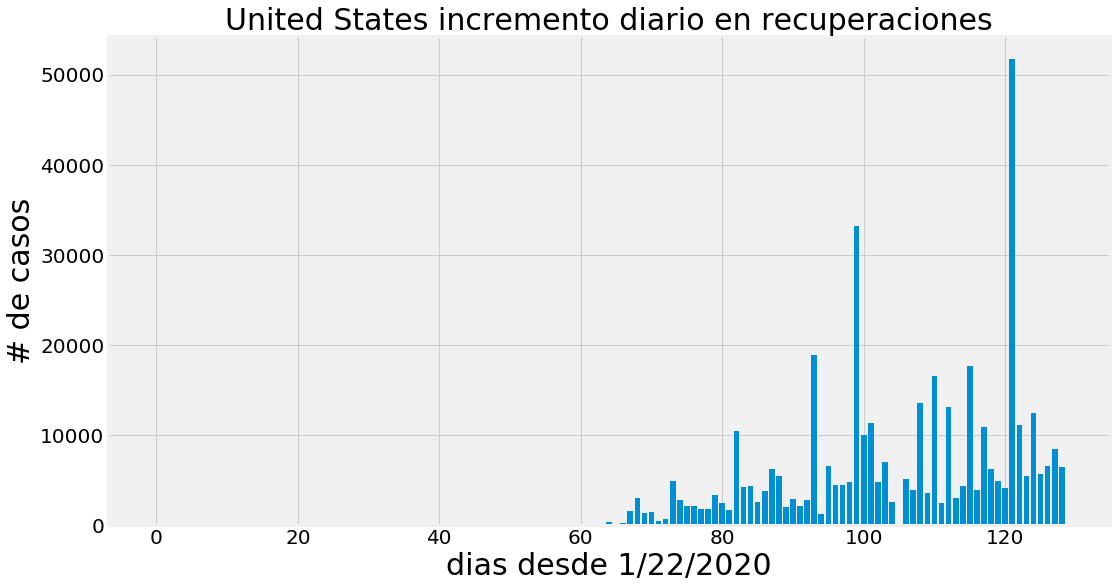

In [34]:
country_plot(adjusted_dates, us_cases, us_daily_increase, us_daily_death, us_daily_recovery, 'United States')

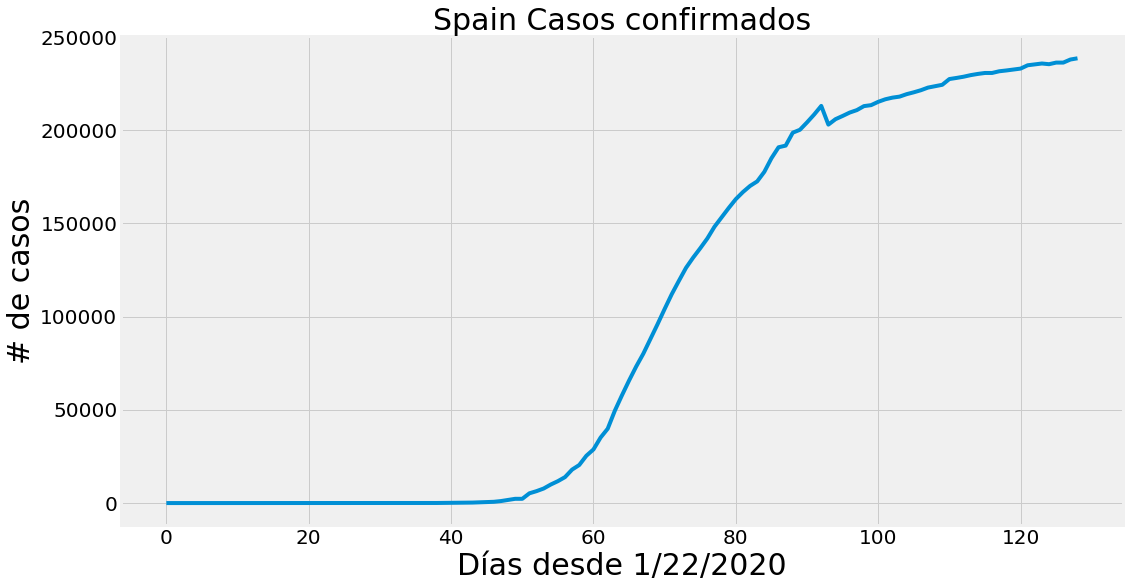

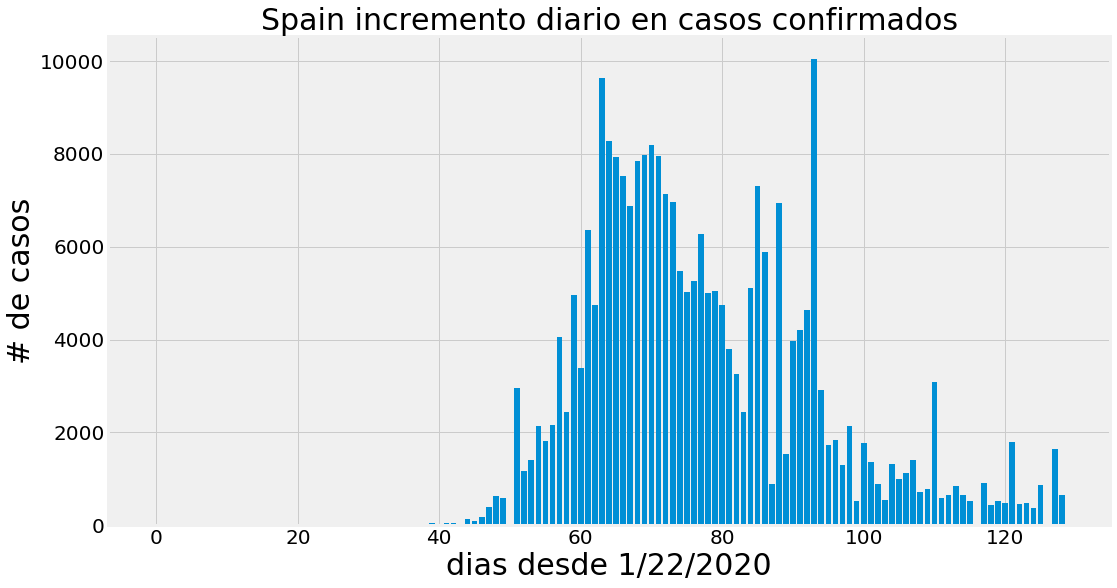

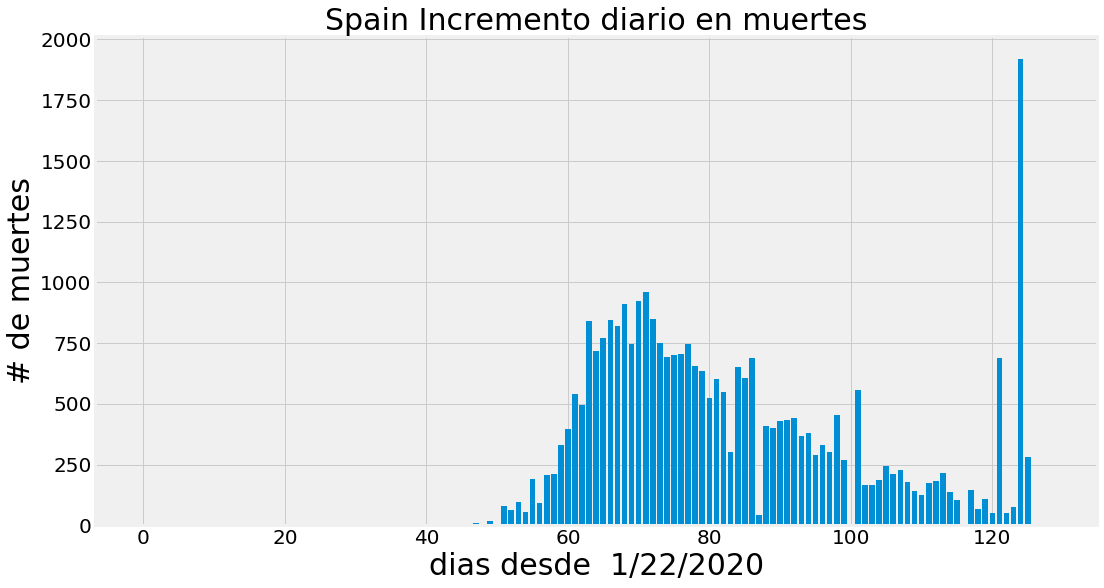

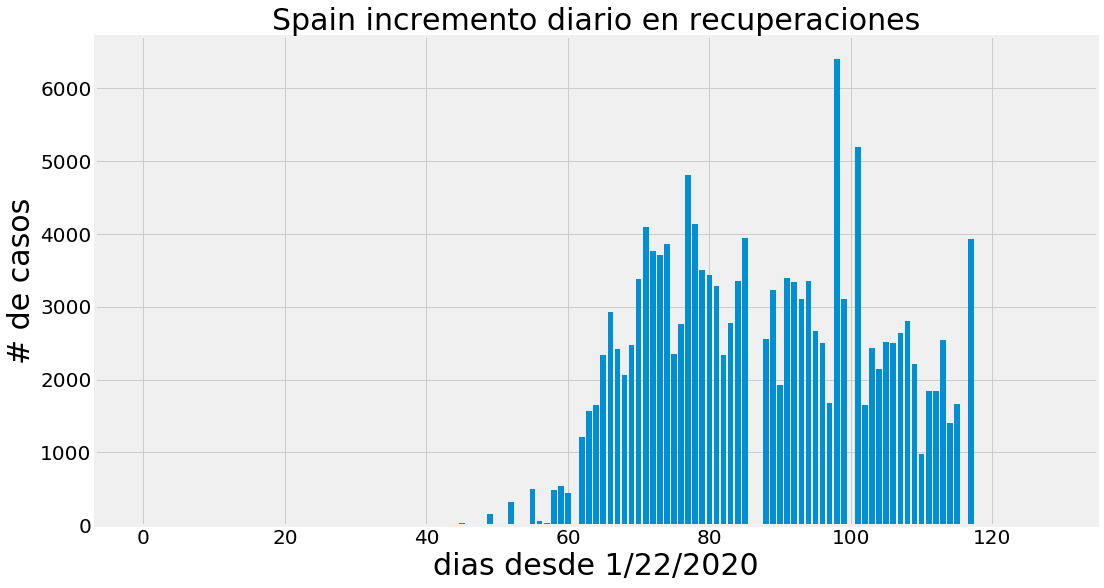

In [35]:
country_plot(adjusted_dates, spain_cases, spain_daily_increase, spain_daily_death, spain_daily_recovery, 'Spain')

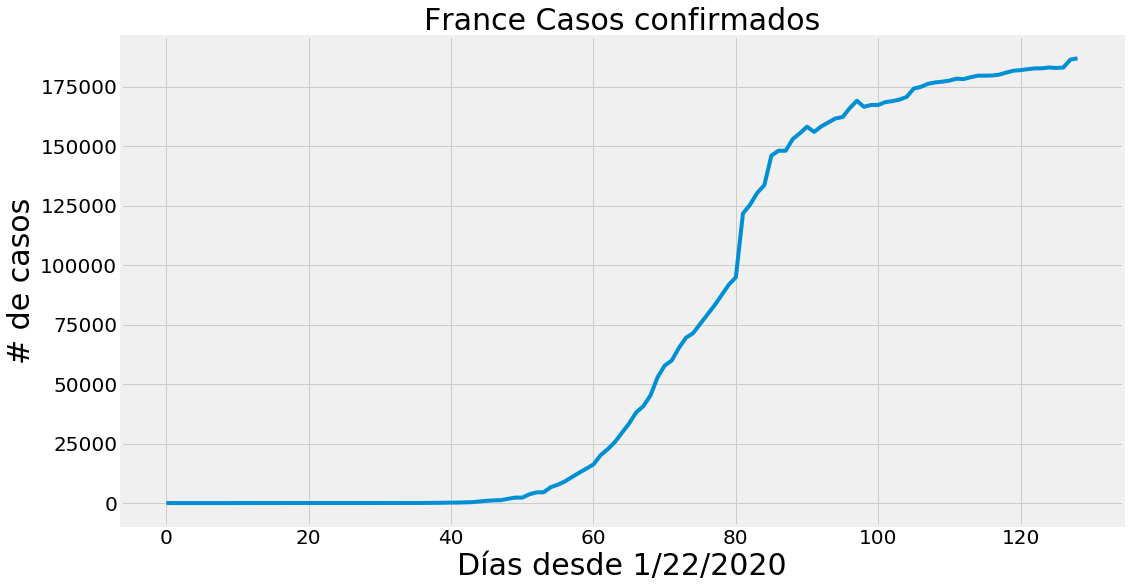

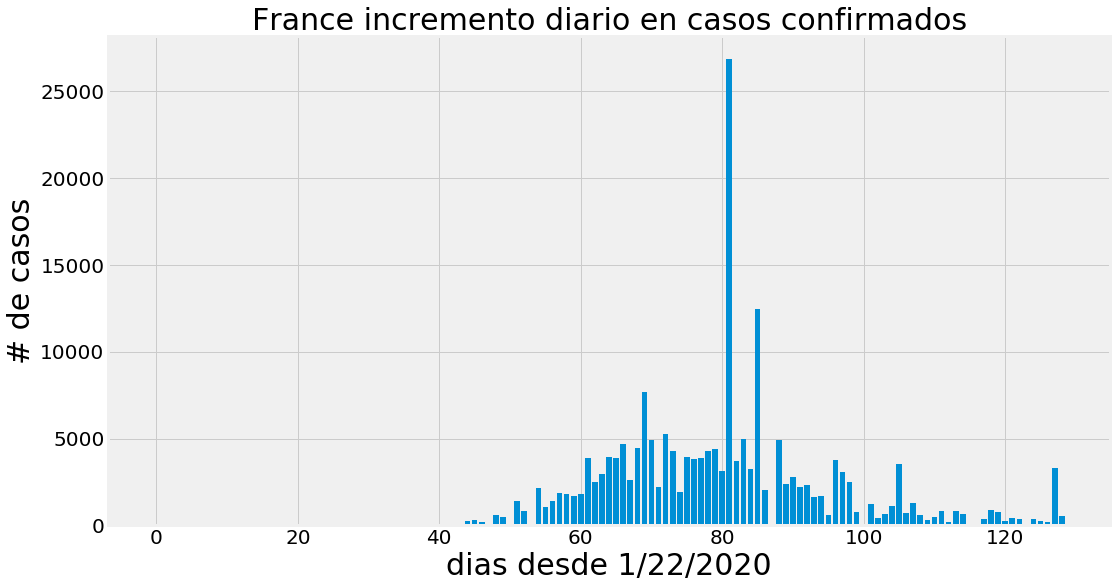

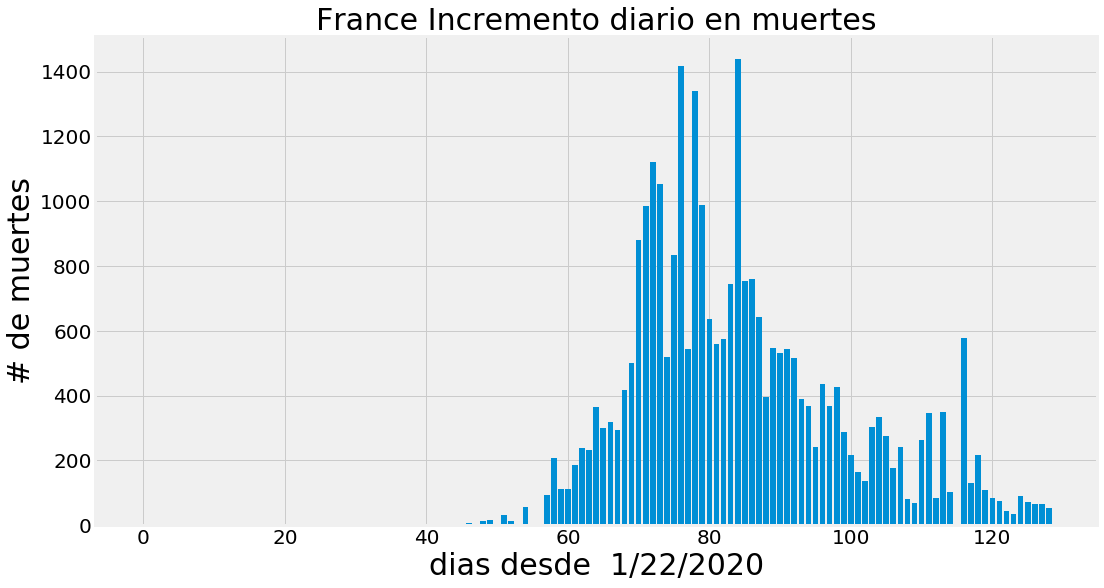

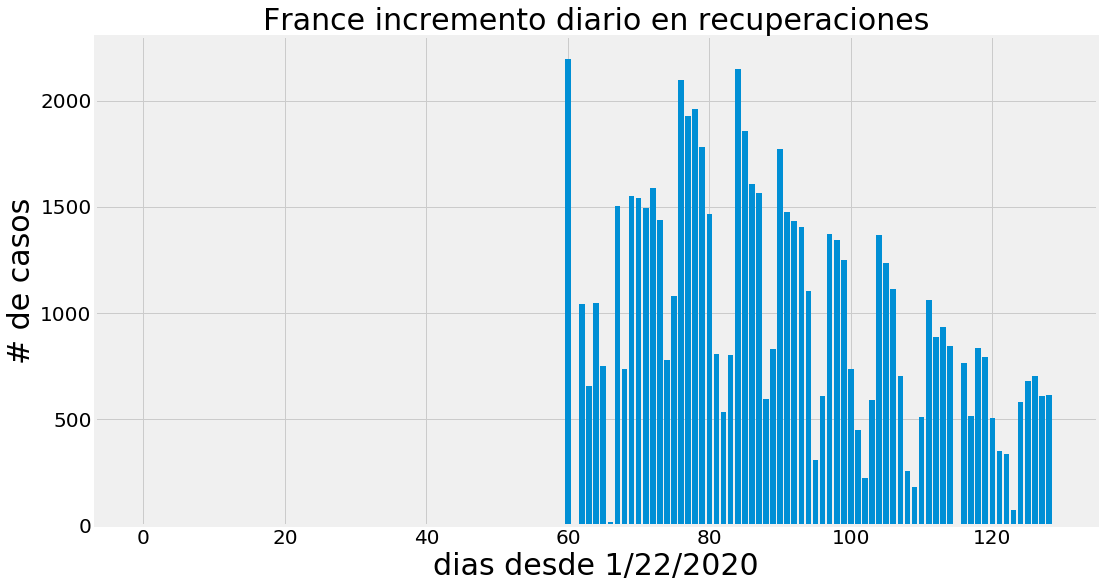

In [36]:
country_plot(adjusted_dates, france_cases, france_daily_increase, france_daily_death, france_daily_recovery, 'France')

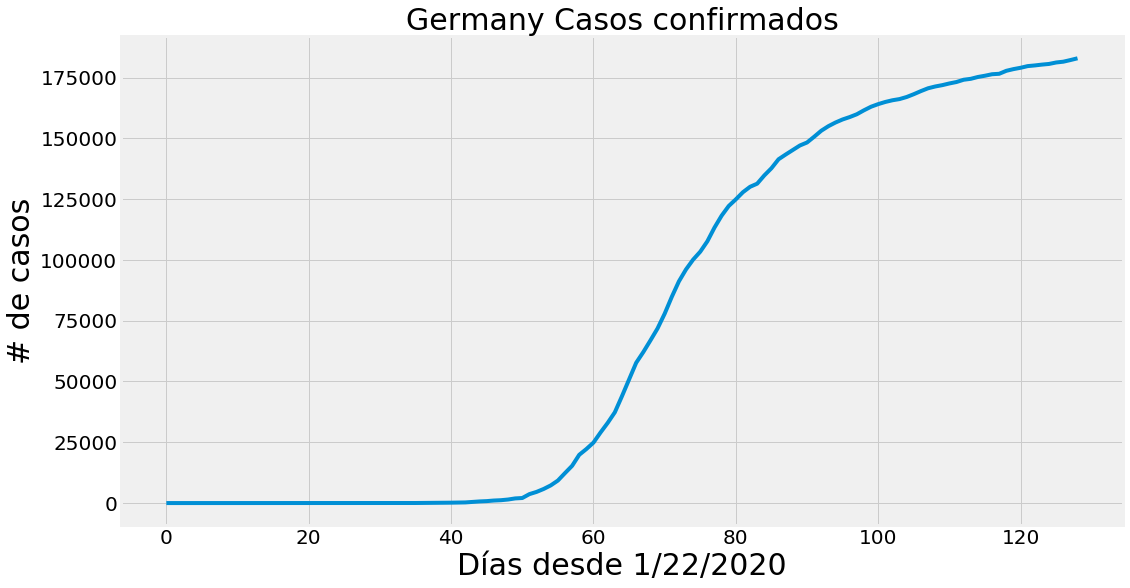

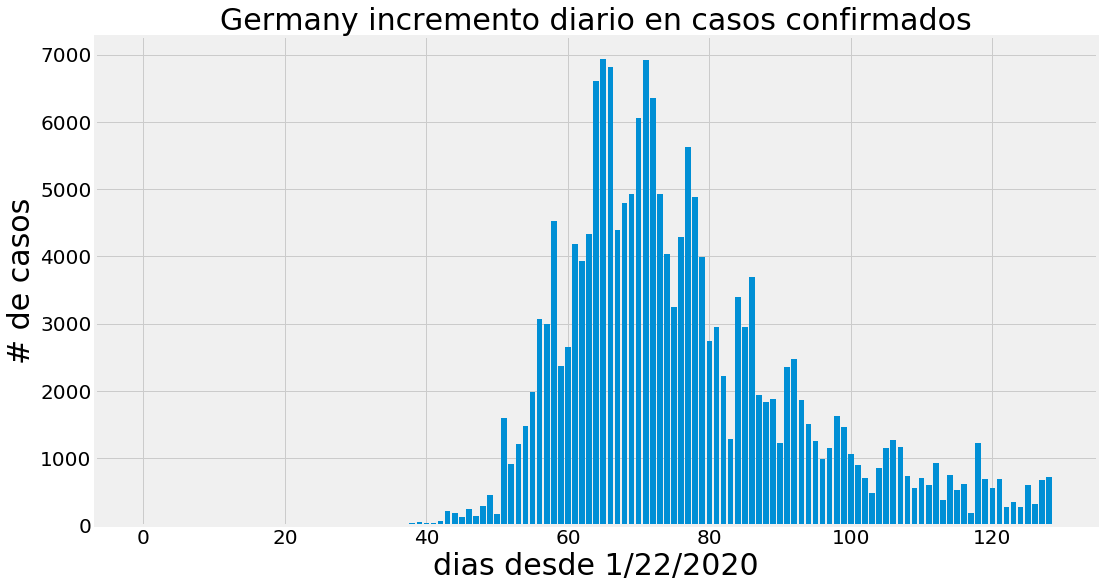

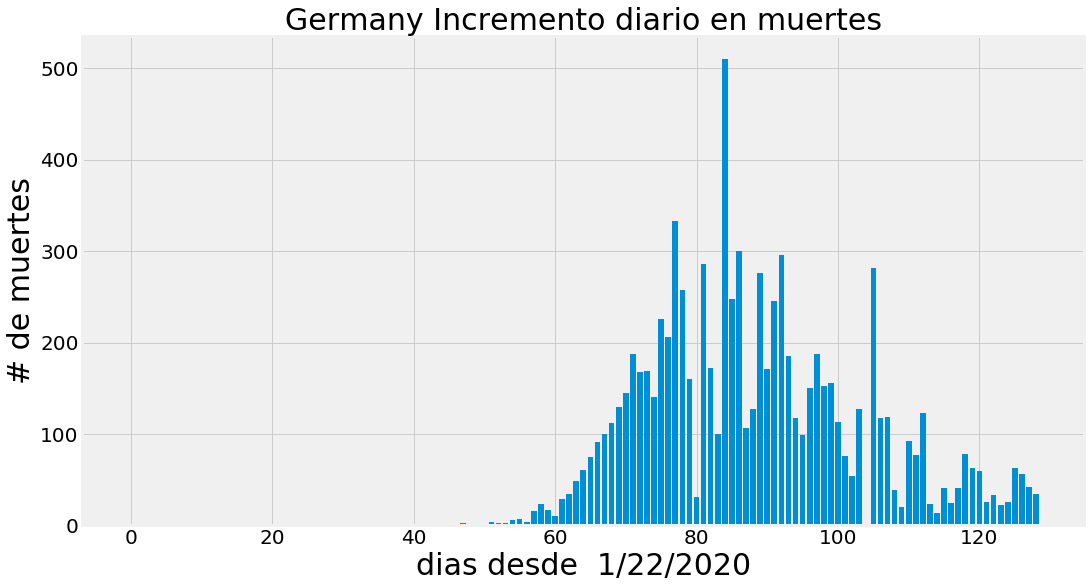

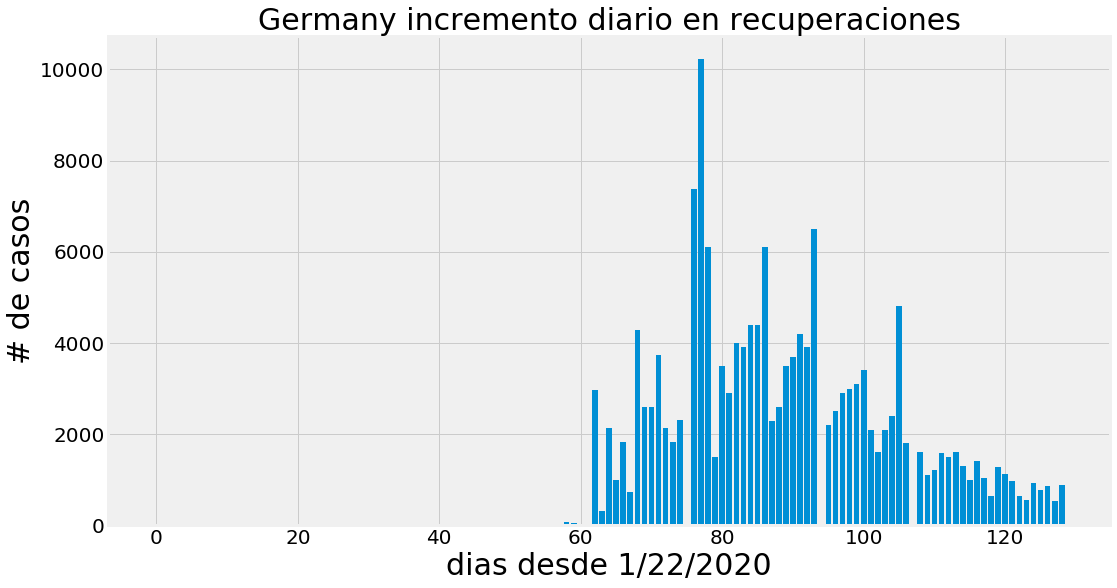

In [37]:
country_plot(adjusted_dates, germany_cases, germany_daily_increase, germany_daily_death, germany_daily_recovery, 'Germany')

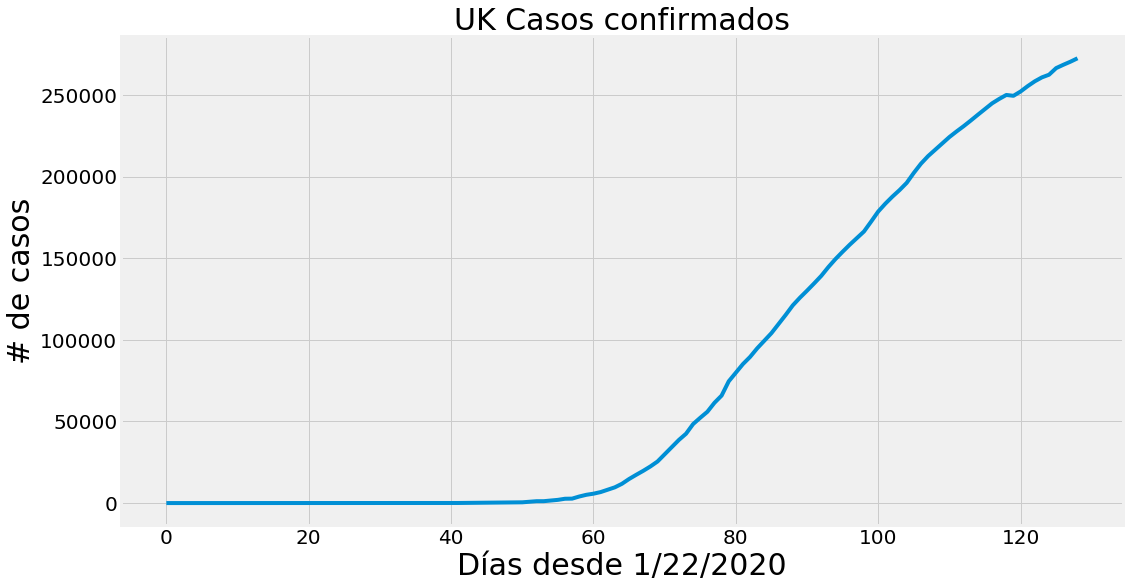

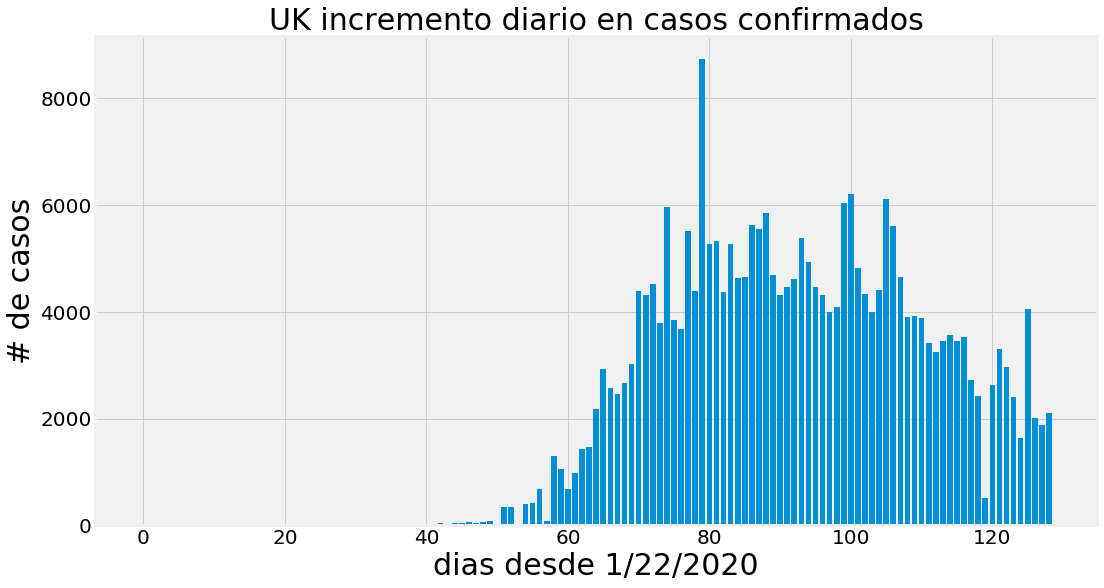

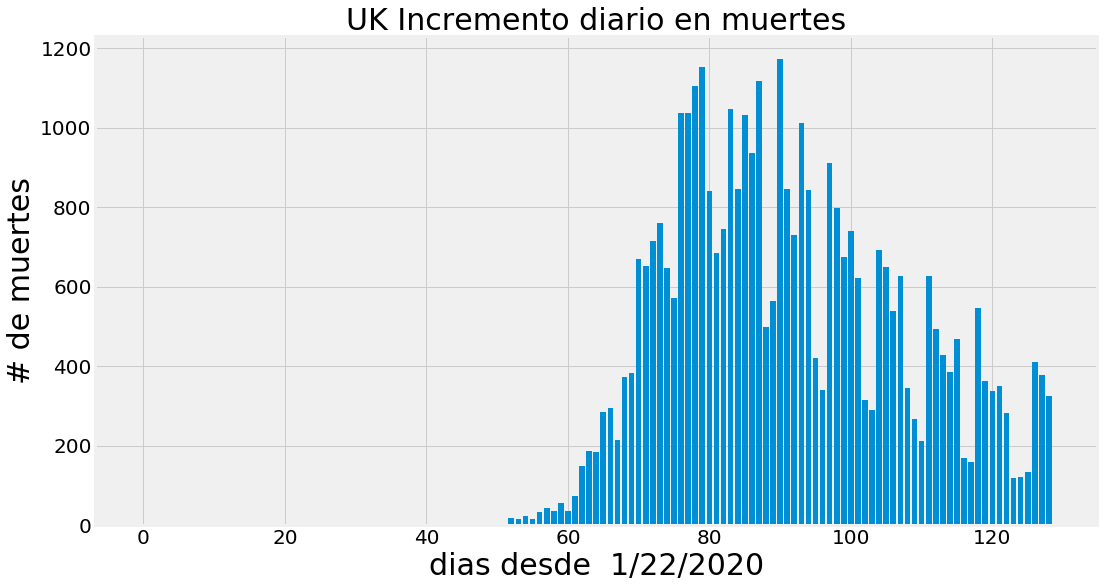

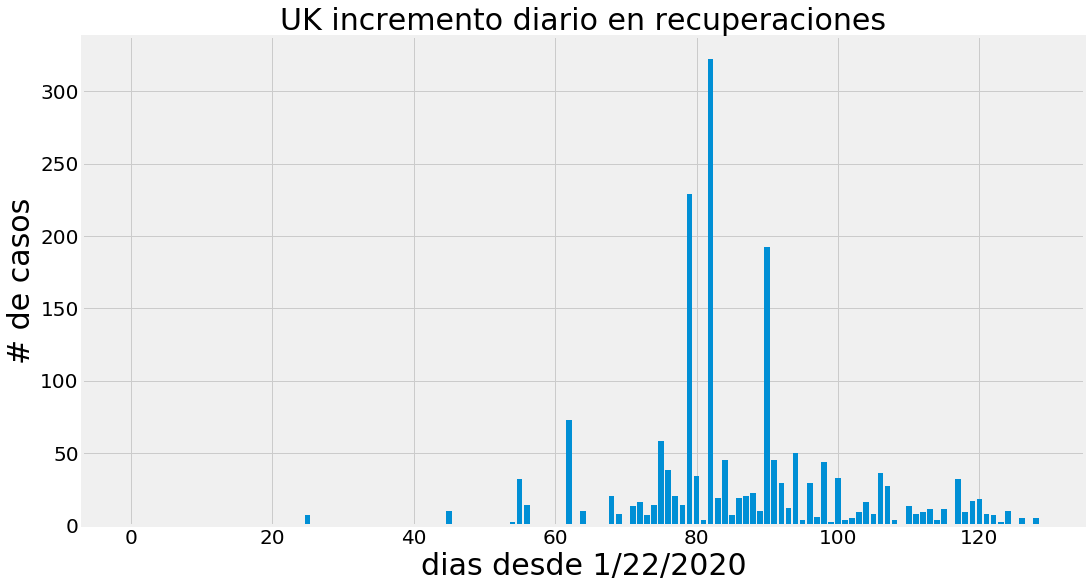

In [38]:
country_plot(adjusted_dates, uk_cases, uk_daily_increase, uk_daily_death, uk_daily_recovery, 'UK')

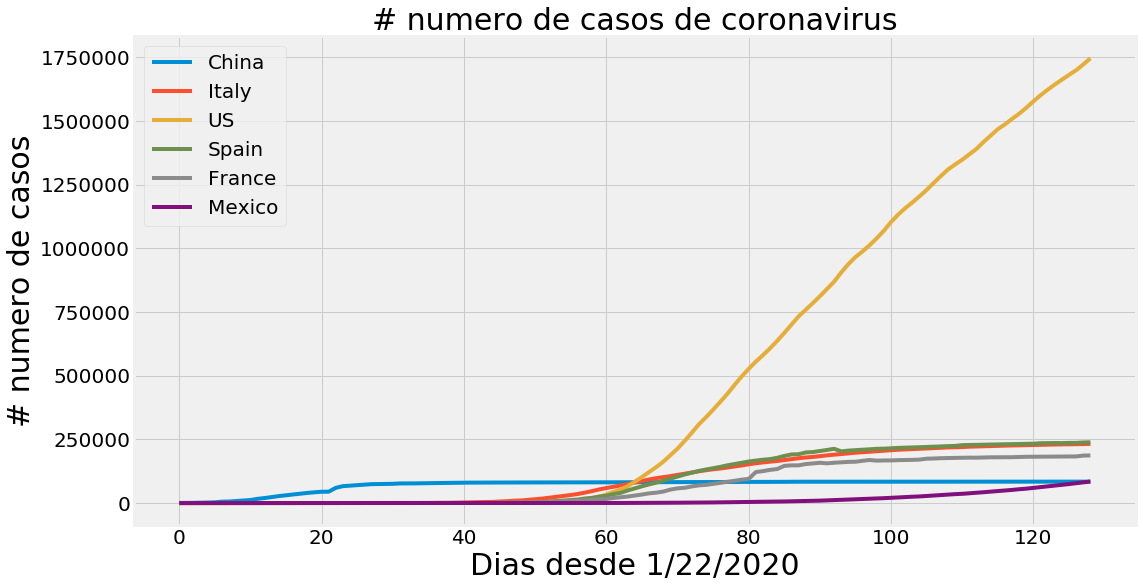

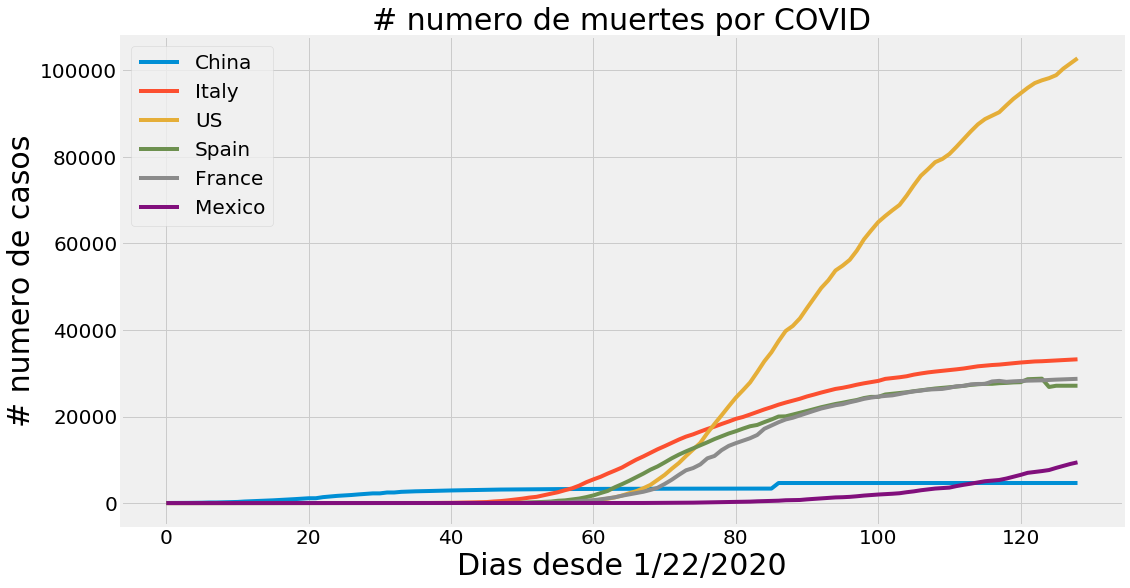

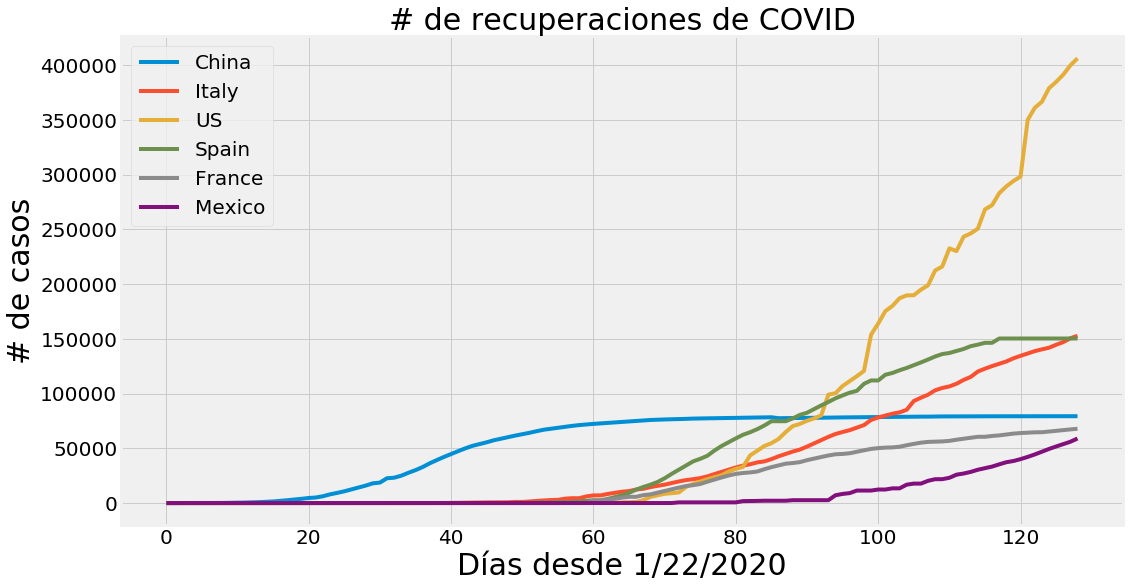

In [39]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, france_cases)
plt.plot(adjusted_dates, mex_cases)
plt.title('# numero de casos de coronavirus', size=30)
plt.xlabel('Dias desde 1/22/2020', size=30)
plt.ylabel('# numero de casos', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France','Mexico'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, spain_deaths)
plt.plot(adjusted_dates, france_deaths)
plt.plot(adjusted_dates, mex_deaths)

plt.title('# numero de muertes por COVID', size=30)
plt.xlabel('Dias desde 1/22/2020', size=30)
plt.ylabel('# numero de casos', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France','Mexico'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_recoveries)
plt.plot(adjusted_dates, italy_recoveries)
plt.plot(adjusted_dates, us_recoveries)
plt.plot(adjusted_dates, spain_recoveries)
plt.plot(adjusted_dates, france_recoveries)
plt.plot(adjusted_dates, mex_recoveries)
plt.title('# de recuperaciones de COVID', size=30)
plt.xlabel('Días desde 1/22/2020', size=30)
plt.ylabel('# de casos', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France','Mexico'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [40]:
def plot_predictions(x,y,pred,algo_name,color):
    plt.figure(figsize=(16,9))
    plt.plot(x,y)
    plt.plot(future_forcast,pred,linestyle='dashed',color=color)
    plt.title('# de casos de COVID a traves del tpo', size=30)
    plt.xlabel('dias desde 1/22/2020', size=30)
    plt.ylabel('# numero de casos', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

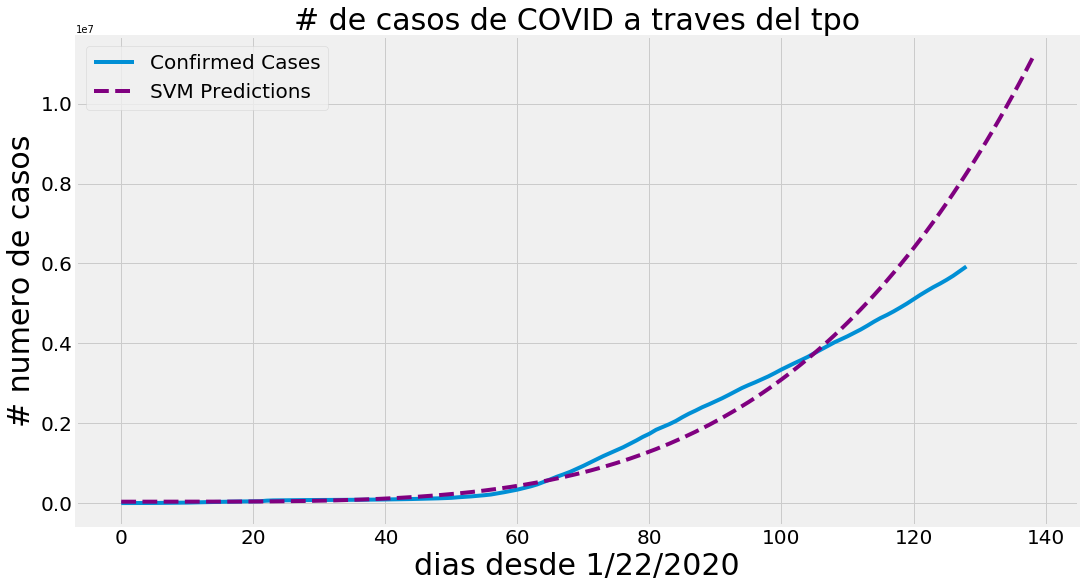

In [41]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple')

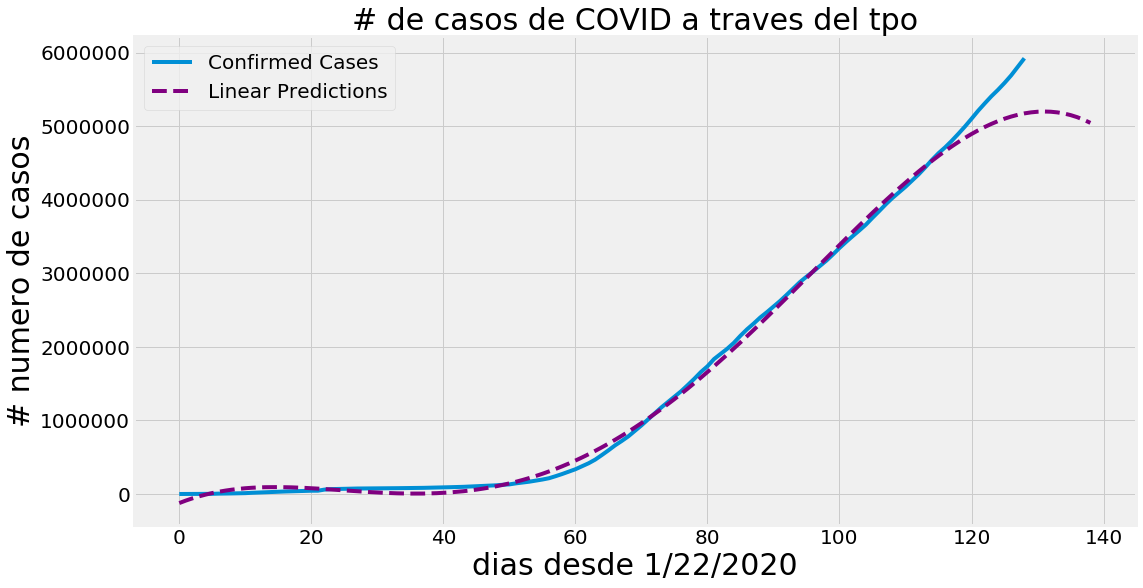

In [42]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Linear Predictions', 'purple')

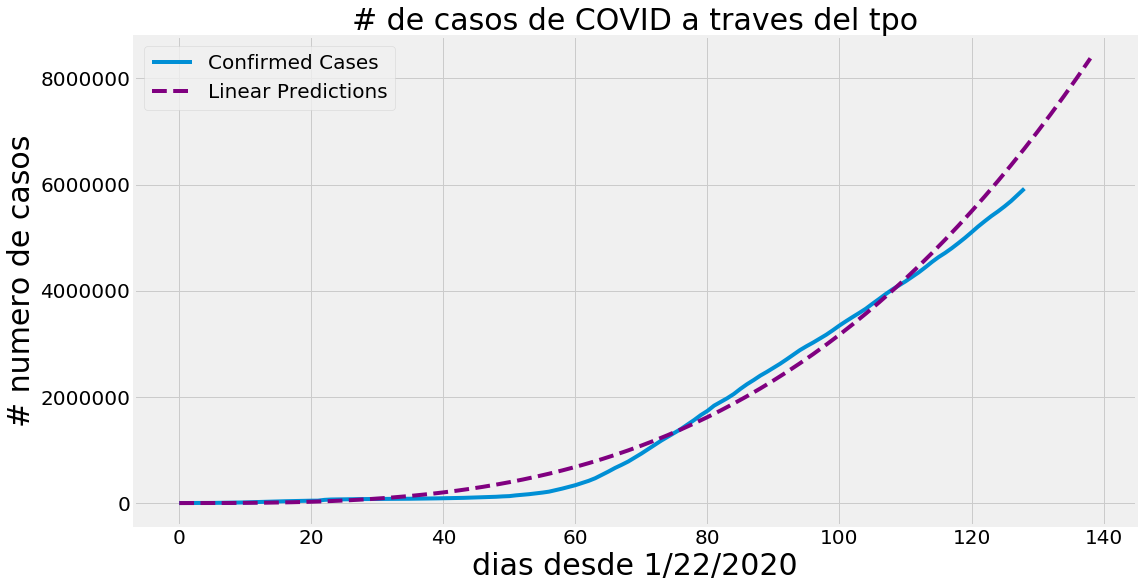

In [43]:
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Linear Predictions', 'purple')

In [44]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM predicción del nppumero de casos mundiales': np.round(svm_pred[-10:])})
svm_df

,Date,SVM predicción del nppumero de casos mundiales
0,05/30/2020,8513083.0
1,05/31/2020,8779055.0
2,06/01/2020,9051237.0
3,06/02/2020,9329724.0
4,06/03/2020,9614613.0
5,06/04/2020,9906000.0
6,06/05/2020,10203985.0
7,06/06/2020,10508666.0
8,06/07/2020,10820142.0
9,06/08/2020,11138514.0


In [45]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'predicción Polynomial  # de casos confirmados mundiales': np.round(linear_pred[-10:])})
svm_df

,Date,predicción Polynomial # de casos confirmados mundiales
0,05/30/2020,5189013.0
1,05/31/2020,5197588.0
2,06/01/2020,5200575.0
3,06/02/2020,5197752.0
4,06/03/2020,5188897.0
5,06/04/2020,5173782.0
6,06/05/2020,5152179.0
7,06/06/2020,5123854.0
8,06/07/2020,5088572.0
9,06/08/2020,5046092.0


In [46]:
#Future predictions using Bayesian Ridge 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'predicción por Bayesian Ridge # de casos confirmados mundiales': np.round(bayesian_pred[-10:])})
svm_df

,Date,predicción por Bayesian Ridge # de casos confirmados mundiales
0,05/30/2020,6837525.0
1,05/31/2020,6998683.0
2,06/01/2020,7162366.0
3,06/02/2020,7328594.0
4,06/03/2020,7497387.0
5,06/04/2020,7668765.0
6,06/05/2020,7842749.0
7,06/06/2020,8019358.0
8,06/07/2020,8198612.0
9,06/08/2020,8380532.0


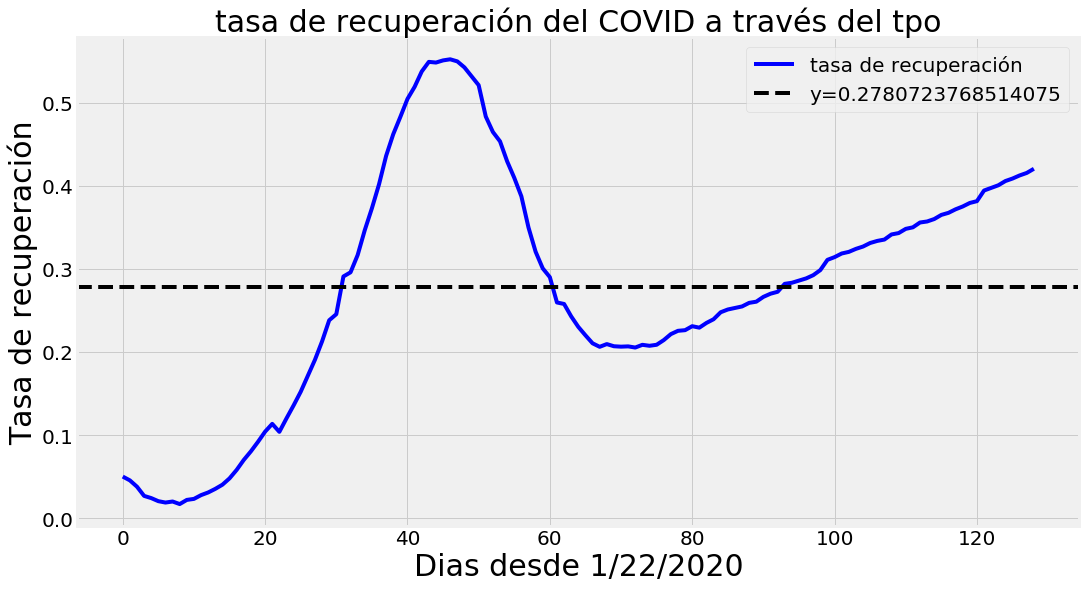

In [47]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('tasa de recuperación del COVID a través del tpo', size=30)
plt.legend(['tasa de recuperación', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Dias desde 1/22/2020', size=30)
plt.ylabel('Tasa de recuperación', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

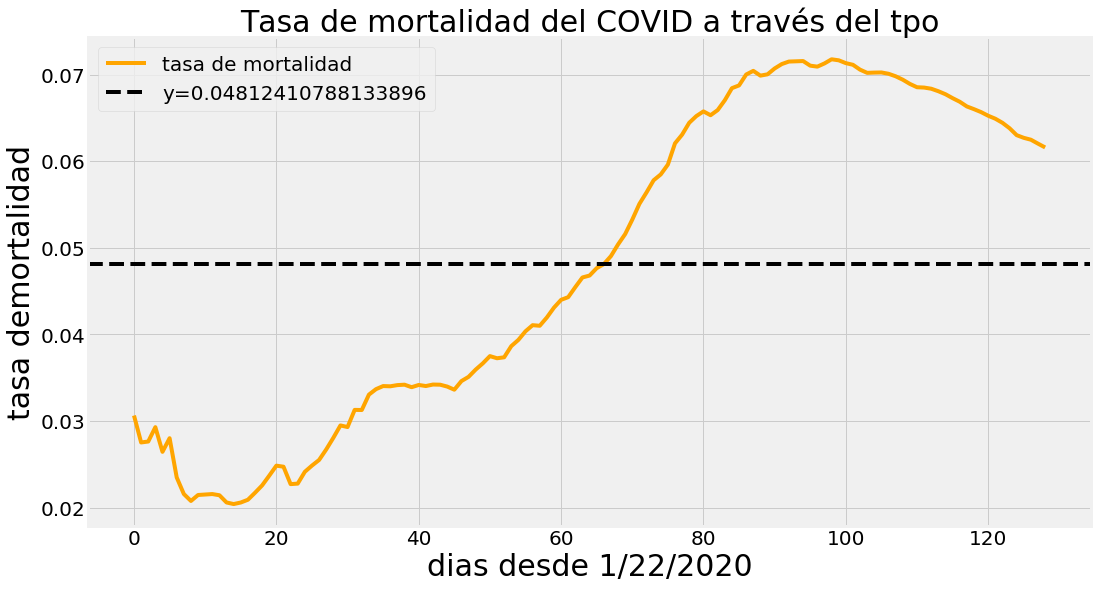

In [48]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Tasa de mortalidad del COVID a través del tpo', size=30)
plt.legend(['tasa de mortalidad', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('dias desde 1/22/2020', size=30)
plt.ylabel('tasa demortalidad', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

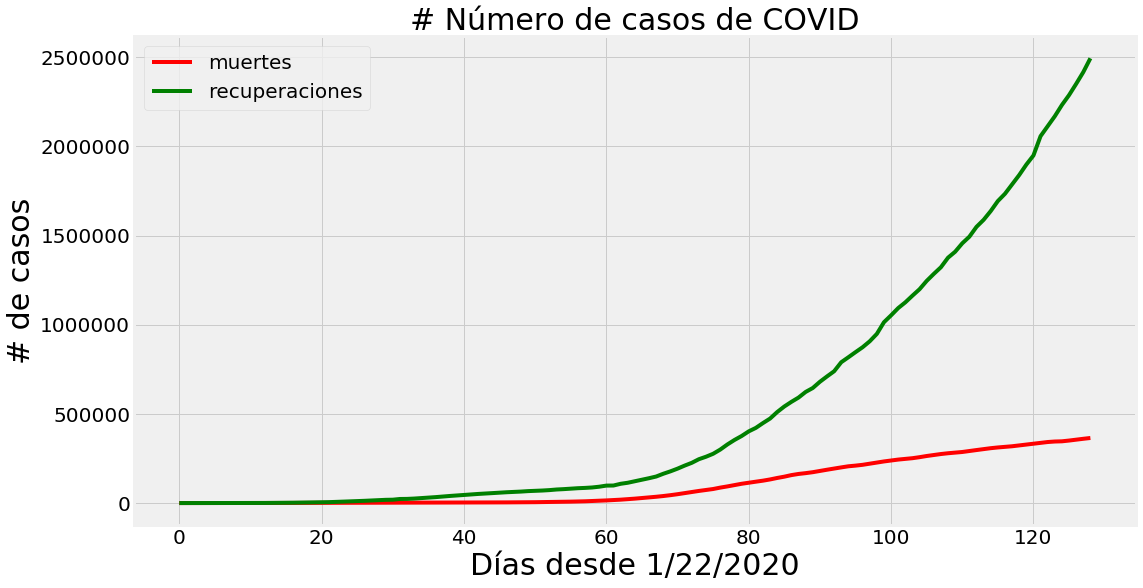

In [49]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['muertes', 'recuperaciones'], loc='best', fontsize=20)
plt.title('# Número de casos de COVID', size=30)
plt.xlabel('Días desde 1/22/2020', size=30)
plt.ylabel('# de casos', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

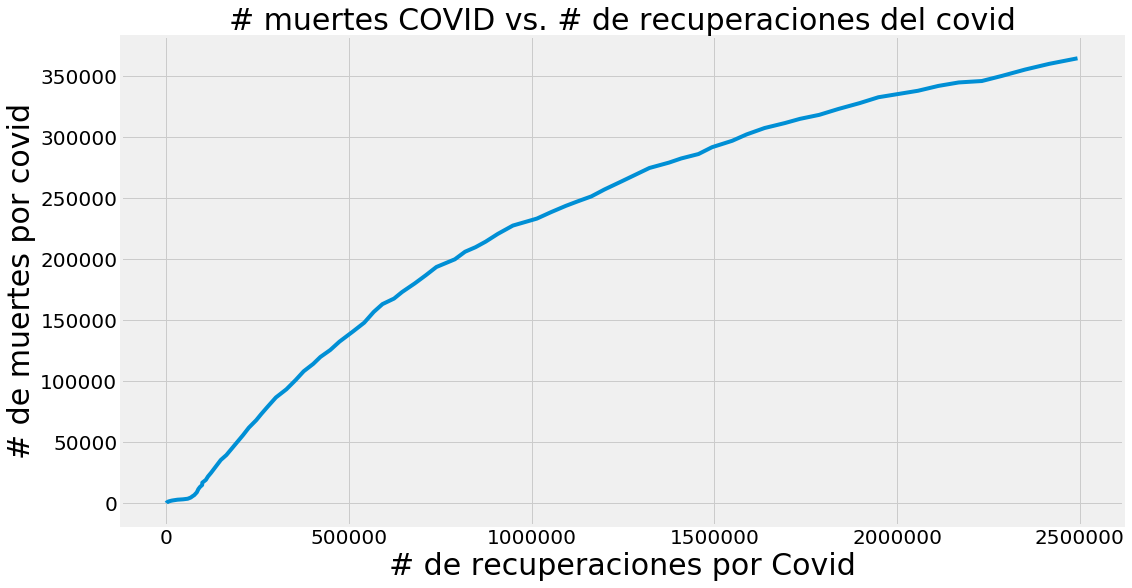

In [50]:
plt.figure(figsize=(16, 9))
plt.plot(total_recovered, total_deaths)
plt.title('# muertes COVID vs. # de recuperaciones del covid', size=30)
plt.xlabel('# de recuperaciones por Covid', size=30)
plt.ylabel('# de muertes por covid', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [51]:
unique_countries = list(latest_data['Country_Region'].unique())

In [52]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = [] 

no_cases = []

for i in unique_contries:
    cases = latest_data[latest_data['Country_Region'] == i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)
    

NameError: name 'unique_contries' is not defined

In [ ]:
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]

In [ ]:
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

In [ ]:
country_df = pd.DataFrame({'Nombre del pais': unique_countries, 'Casos confirmados': country_confirmed_cases,
                          'Muertes': country_death_cases, 'Recuperaciones' : country_recovery_cases, 
                          'Casos Activos' : country_active_cases,
                          'Tasa de mortalidad': country_mortality_rate})
# number of cases per country/region
country_df.style.background_gradient(cmap='Greens')

In [ ]:
unique_provinces =  list(latest_data['Province_State'].unique())

In [ ]:
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
province_recovery_cases = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [ ]:
# number of cases per province/state/city
province_df = pd.DataFrame({'Estado': unique_provinces, 'Pais': province_country, 'Nuemro de casos confirmados': province_confirmed_cases,
                          'Numero de muertes': province_death_cases, 'Recuperados' : province_recovery_cases,
                          'Indice de mortalidad': province_mortality_rate})
# number of cases per country/region

province_df.style.background_gradient(cmap='Greens')